In [1]:
import os
import sys

sys.path.insert(0, os.path.abspath('../'))
from src.data import make_dataset as make_ds
from src.data import dataframegenerator as gendf#, workers, multiproc
from src.visualization import data_visualization as dtview
import src.forecast_metrics as fm
import src.prophet_forecast as pfcst
from src.data import dataexplore as dtexp
from fbprophet import Prophet
from src.data import crossvalidation as cv
from src.data import datacleaner as dtclean
import settings as settings
from models import save_load_model as models
import multiprocessing as mp
import numpy as np
import tqdm
from itertools import repeat
from beautifultable import BeautifulTable
import pandas as pd
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot
import warnings
import seaborn as sns
import re
import datetime
from IPython.display import Image
import locale
from src.data import detect_outliers as do
plt.style.use('ggplot')
sns.set_style('darkgrid', {'axes.facecolor': '.9'})
sns.set_palette(palette='deep')
sns_c = sns.color_palette(palette='deep')
%matplotlib inline
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

from pandas.plotting import register_matplotlib_converters
locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')
register_matplotlib_converters()

warnings.filterwarnings('ignore')

path, csvpath, imgpath, neg_values_path, large_file_path, model_path = settings.get_file_path()

files_path = {'path': path
              , 'csv': csvpath
              , 'img': imgpath
              , 'neg_values': neg_values_path
              , 'large_files': large_file_path
              , 'models': model_path 
             }
undesired_column = 'Unnamed: 0'

Using Prophet to detect anomalies! Confidence interval of 80.0 %.

Initial log joint probability = -10.8876
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        396527   2.55525e-05       1122.83           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        396531   5.34026e-05       15149.5     0.08481           1      237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        396542    0.00192927       11588.1      0.4326           1      353   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     381        396549   1.30744e-05       690.585           1           1      442   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
A total of 787 anomalies were flagged!



ds       trend  yhat_lower   yhat_upper  trend_lower  \
0      2015-01-02 10:00:00  196.836806 -311.080965   823.525309   196.836806   
1      2015-01-02 10:30:00  196.840625 -234.593700   911.687703   196.840625   
2      2015-01-02 11:00:00  196.844444 -170.025537  1017.957367   196.844444   
3      2015-01-02 11:30:00  196.848263  -88.620977  1025.917926   196.848263   
4      2015-01-02 12:00:00  196.852083  -55.392586  1096.520279   196.852083   
...                    ...         ...         ...          ...          ...   
101573 2020-10-18 12:30:00  104.858806 -144.553760   928.068779   104.858806   
101574 2020-10-18 13:00:00  104.859237 -248.353510   883.984414   104.859237   
101575 2020-10-18 13:30:00  104.859668 -267.048096   894.322915   104.859668   
101576 2020-10-18 14:00:00  104.860099 -336.535975   753.853536   104.860099   
101577 2020-10-18 14:30:00  104.860530 -424.530562   674.174280   104.860530   

        trend_upper  additive_terms  additive_terms_lower  \
0        196.836806       67.703088             67.703088   
1        196.840625      147.488174            147.488174   
2        196.844444      222.903665            222.903665   
3        196.848263      284.092616            284.092616   
4        196.852083      322.270340            322.270340   
...             ...             ...                   ...   
101573   104.858806      259.054386            259.054386   
101574   104.859237      233.469185            233.469185   
101575   104.859668      180.977425            180.977425   
101576   104.860099      109.486554            109.486554   
101577   104.860530       30.056874             30.056874   

        additive_terms_upper       daily  ...  weekly_upper     yearly  \
0                  67.703088  100.328003  ...    -13.322028 -19.302887   
1                 147.488174  177.982835  ...    -11.098918 -19.395743   
2                 222.903665  251.157099  ...     -8.764912 -19.488521   
3                 284.092616  309.999339  ...     -6.325503 -19.581220   
4                 322.270340  345.730739  ...     -3.786559 -19.673839   
...                      ...         ...  ...           ...        ...   
101573            259.054386  352.498944  ...    -90.425384  -3.019174   
101574            233.469185  328.778398  ...    -92.219299  -3.089914   
101575            180.977425  277.960891  ...    -93.822811  -3.160656   
101576            109.486554  207.951250  ...    -95.233298  -3.231398   
101577             30.056874  129.807667  ...    -96.448654  -3.302139   

        yearly_lower  yearly_upper  multiplicative_terms  \
0         -19.302887    -19.302887                   0.0   
1         -19.395743    -19.395743                   0.0   
2         -19.488521    -19.488521                   0.0   
3         -19.581220    -19.581220                   0.0   
4         -19.673839    -19.673839                   0.0   
...              ...           ...                   ...   
101573     -3.019174     -3.019174                   0.0   
101574     -3.089914     -3.089914                   0.0   
101575     -3.160656     -3.160656                   0.0   
101576     -3.231398     -3.231398                   0.0   
101577     -3.302139     -3.302139                   0.0   

        multiplicative_terms_lower  multiplicative_terms_upper        yhat  \
0                              0.0                         0.0  264.539894   
1                              0.0                         0.0  344.328799   
2                              0.0                         0.0  419.748110   
3                              0.0                         0.0  480.940879   
4                              0.0                         0.0  519.122423   
...                            ...                         ...         ...   
101573                         0.0                         0.0  363.913192   
101574                         0.0                         0.0  338.328422   
101575            

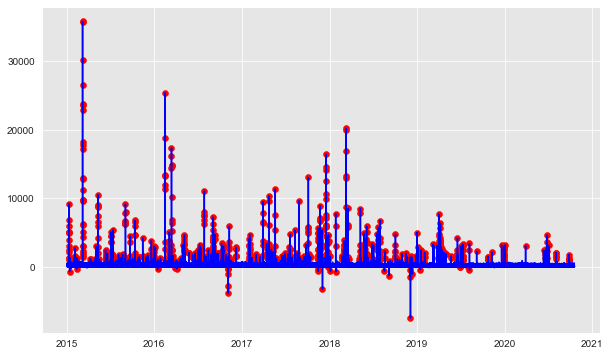

In [6]:

df = pd.read_csv(csvpath + '/datasets/df_40.csv', sep=',')
df['ds'] = pd.DatetimeIndex(df['ds'])
df.drop(columns='Unnamed: 0', inplace=True)
#df['y'] = df[df['y'] > 0]
do.detect_outliers(df,'prophet',prophet_interval_width=0.80)

Initial log joint probability = -10.8876
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        396527   2.55525e-05       1122.83           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        396531   5.34026e-05       15149.5     0.08481           1      237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        396542    0.00192927       11588.1      0.4326           1      353   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     381        396549   1.30744e-05       690.585           1           1      442   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


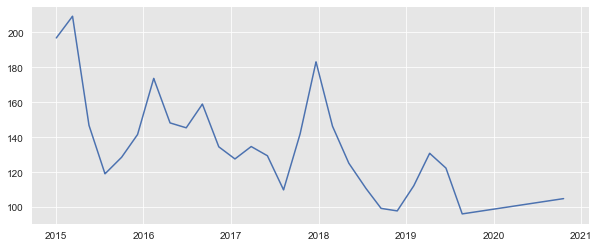

In [10]:
df = pd.read_csv(csvpath + '/datasets/df_40.csv', sep=',')
df['ds'] = pd.DatetimeIndex(df['ds'])
#df.set_index('ds',inplace=True)
df.drop(columns='Unnamed: 0', inplace=True)
#df_trn, df_tst, threshold_date = dtexp.split_dataframe(df)
mdl = Prophet()
mdl.fit(df)
future = mdl.make_future_dataframe(periods=7, freq='30min')
future['ds'] = pd.to_datetime(future['ds'])
future = future.set_index(pd.DatetimeIndex(future['ds']))
forecast = mdl.predict(future)
forecast = dtclean.remove_forecast_negative_values(forecast)
dtview.plot_trend(forecast, mdl, filename='trend_40_2015-2020_')

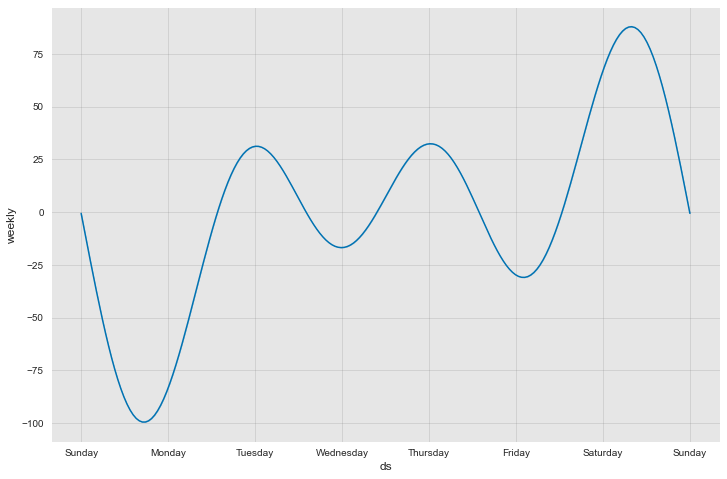

In [18]:
dtview.plot_seasonality(model=mdl, name='weekly', filename='40_weekly_seasonality_')

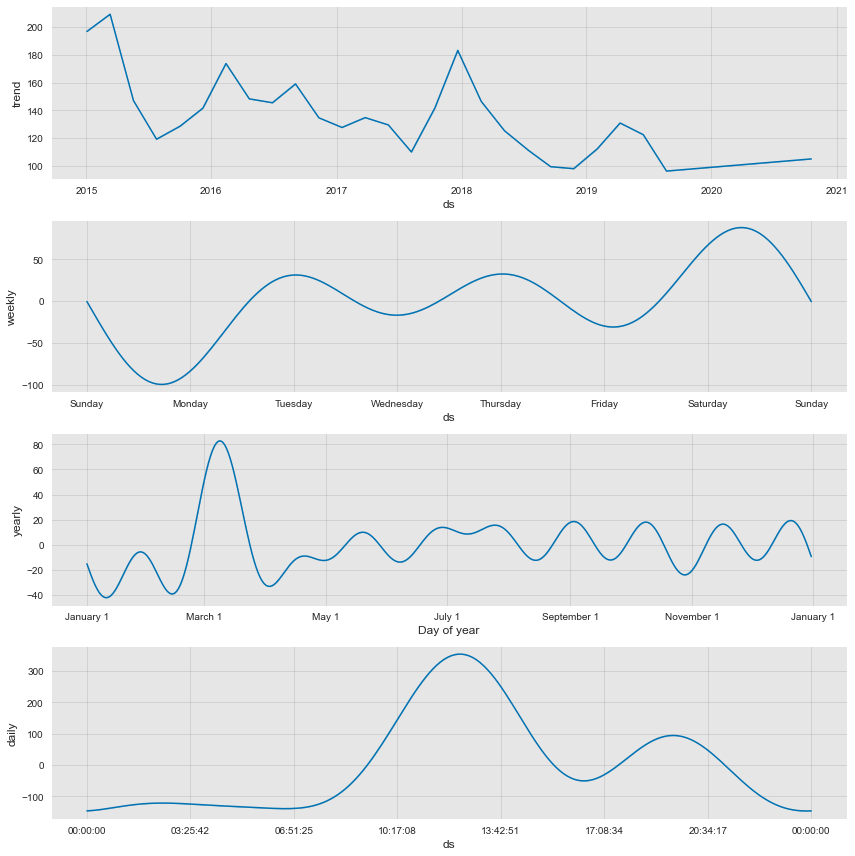

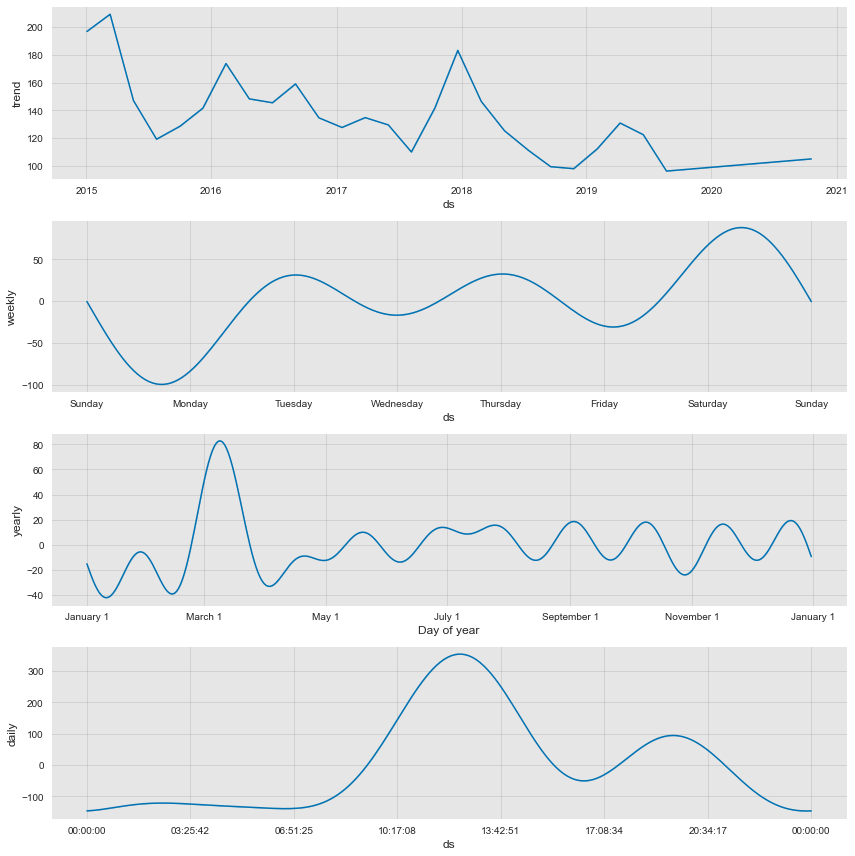

In [19]:
mdl.plot_components(forecast, figsize=(12,12))

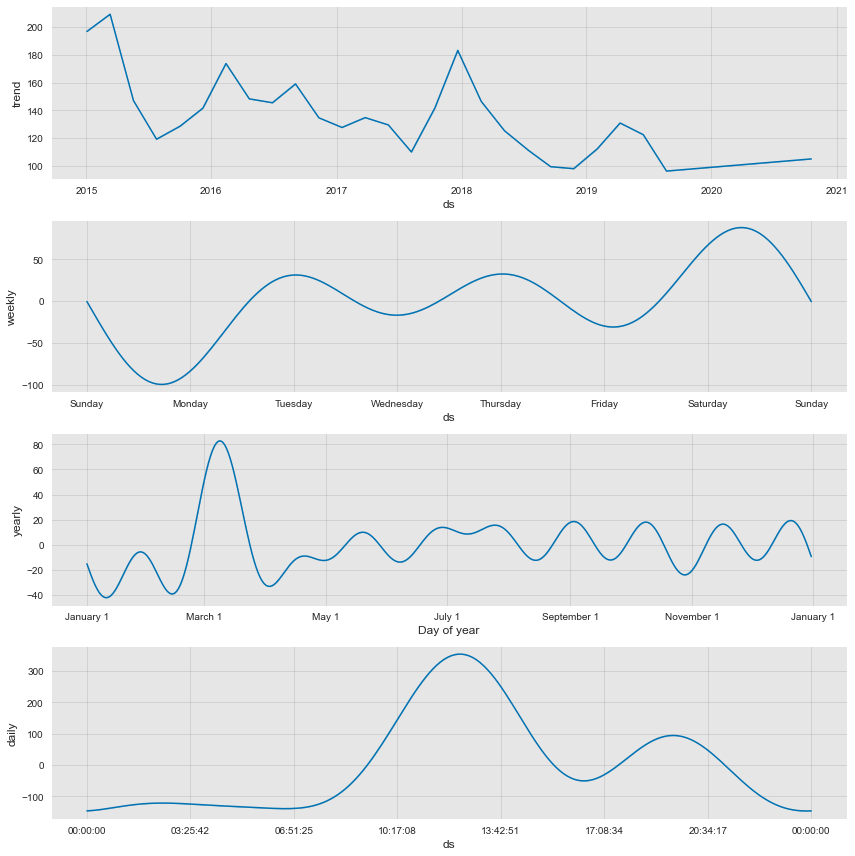

In [22]:
dtview.plot_fcst_components(forecast, mdl, '40_components_')

In [26]:
df = make_ds.get_dataset(table='sisqual_all'
                             , columns=['store', 'ds', 'n_clients']
                             , col_to_rename='n_clients'
                             , store='40')
df.head()

index  store                  ds   y
265476  265476     40 2015-01-02 10:00:00  13
265477  265477     40 2015-01-02 10:15:00  15
265478  265478     40 2015-01-02 10:30:00  25
265479  265479     40 2015-01-02 10:45:00  31
265480  265480     40 2015-01-02 11:00:00  33

Initial log joint probability = -3460.41
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        192169     0.0170872       12147.1           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        192496   0.000346784       1891.96           1           1      234   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        192514    0.00538179       1948.84           1           1      341   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        192535   0.000151873       353.099           1           1      449   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        192555    0.00498056       1273.24           1           1      557   
    Iter      log prob        ||dx||      ||grad||       alpha  

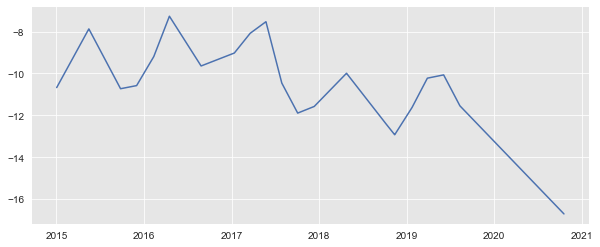

In [29]:
df['ds'] = pd.DatetimeIndex(df['ds'])
#df.set_index('ds',inplace=True)
#df.drop(columns='Unnamed: 0', inplace=True)
#df_trn, df_tst, threshold_date = dtexp.split_dataframe(df)
mdl = Prophet()
mdl.fit(df)
future = mdl.make_future_dataframe(periods=7, freq='30min')
future['ds'] = pd.to_datetime(future['ds'])
future = future.set_index(pd.DatetimeIndex(future['ds']))
forecast = mdl.predict(future)
forecast = dtclean.remove_forecast_negative_values(forecast)
dtview.plot_trend(forecast, mdl, filename='trend_40_client_2015-2020_')


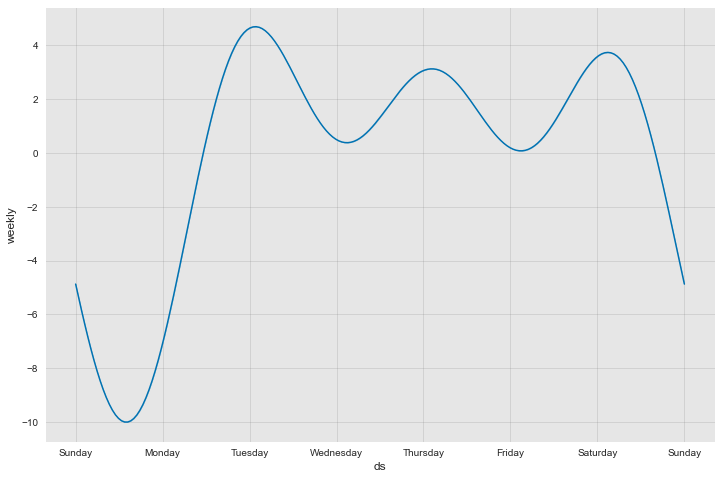

In [30]:
dtview.plot_seasonality(model=mdl, name='weekly', filename='40_cli_weekly_seasonality_')

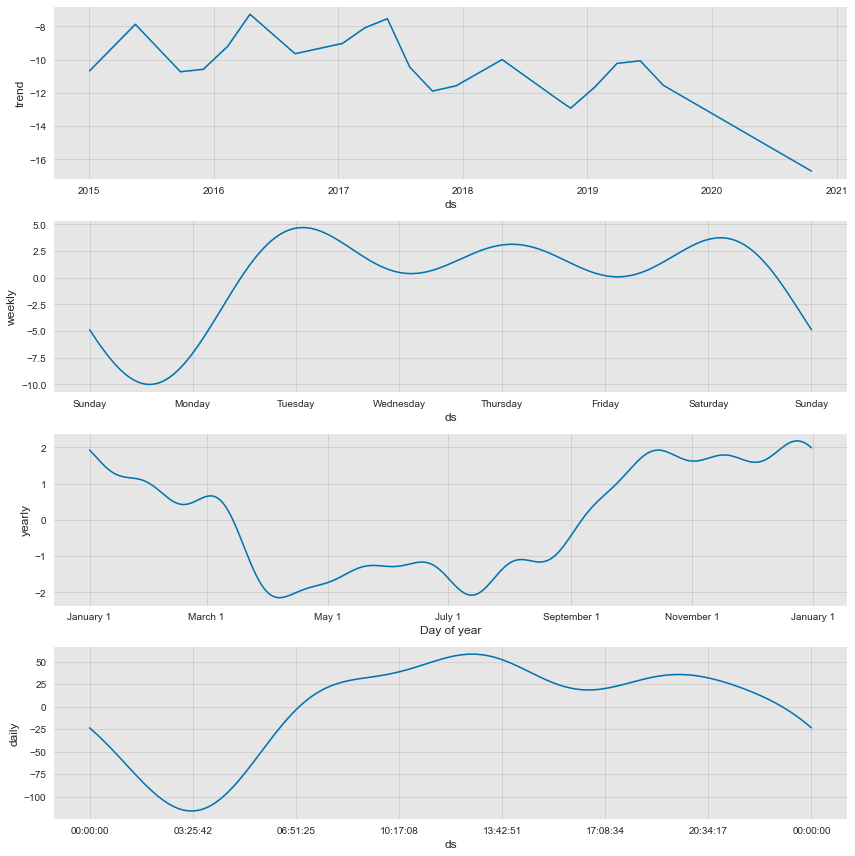

In [31]:
dtview.plot_fcst_components(forecast, mdl, '40_cli_components_')

In [4]:
df = make_ds.get_dataset(table='sisqual_all'
                             , columns=['store', 'ds', 'sales']
                             , col_to_rename='sales')
df_non_negative_test=dtclean.remove_df_negative_values(df)
df_non_negative_test.to_csv(path+'/data/sisqual_non_negative_values.csv')
plt.style.use('seaborn')
plt.tight_layout()
color=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

<Figure size 576x396 with 0 Axes>

In [ ]:
def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

def _phi(m):
    x = [[datapoints[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
    C = [len([1 for x_j in x if _maxdist(x_i, x_j) <= r]) / (N - m + 1.0) for x_i in x]
    return (N - m + 1.0)**(-1) * sum(np.log(C))

# Store 63

<div class="alert alert-block alert-info">
<b>Analyzing data from store 63 to identify possible behaves that drives time series investigation

   + This first plot present the entire time series without negative values.
</div>

<module 'matplotlib.pyplot' from '/usr/local/Caskroom/miniconda/base/envs/venvsisqual2/lib/python3.9/site-packages/matplotlib/pyplot.py'>

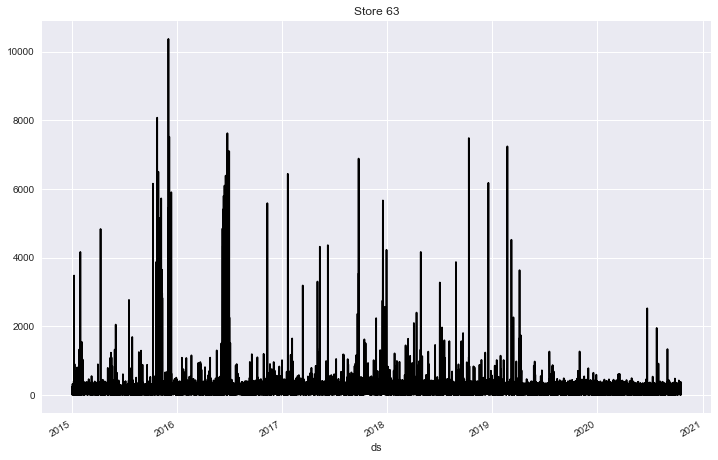

In [5]:
df_store_63 = df_non_negative_test.query('store == 63')
dtview.plot_timeseries(df_store_63,'Store 63',color[6])

<div class="alert alert-block alert-info">
<b>Visually analyze the sales distribution over the months for each year.
</div>

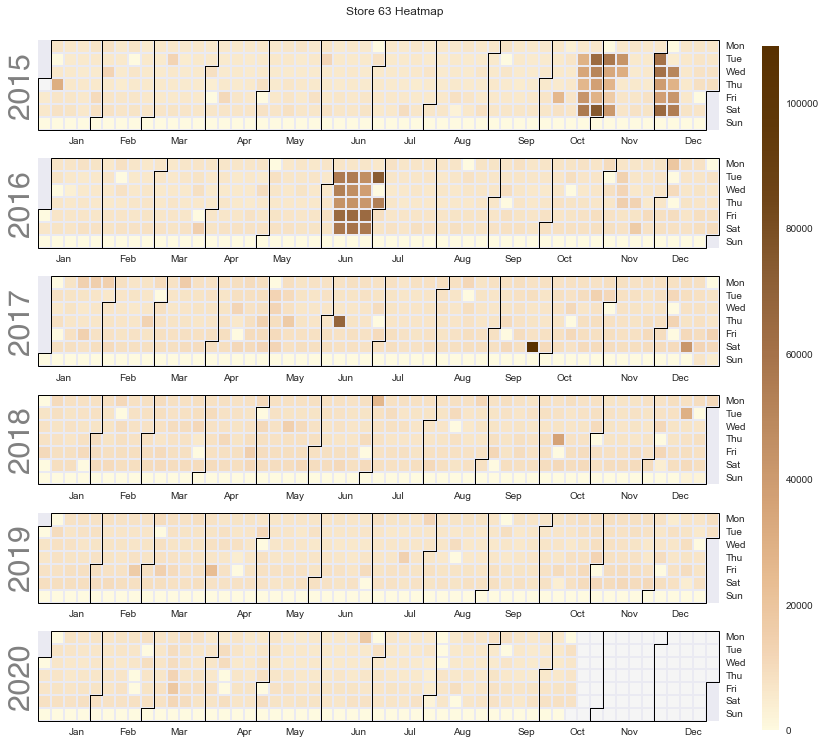

In [6]:

dtview.plot_heatmap(df_store_63,store=63, highlight_month='black')

<div class="alert alert-block alert-info">
<b>Each store has its own hourly data distribution which reveals the real working hour.
</div>

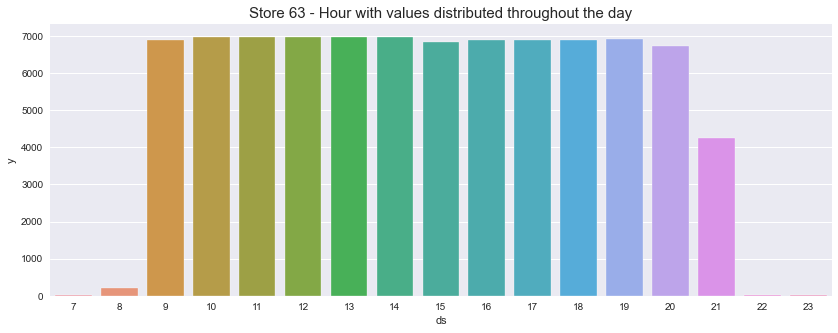

In [5]:

store_no = '63'
df_store_63.reset_index(level=0,inplace=True)
df_store_63['ds'] = pd.DatetimeIndex(df_store_63['ds'])
if undesired_column in df.columns:
    df_store_63.drop(columns=undesired_column, inplace=True)
df_store_63[df_store_63['y'] > 0].groupby(df_store_63['ds'].dt.hour)['ds'].count()
most_freq_hours = dtview.view_df_hours_distribution(df_store_63, store_no)

<div class="alert alert-block alert-info">
<b>The following plot evidences the weekly sales distribution in this time series.
</div>

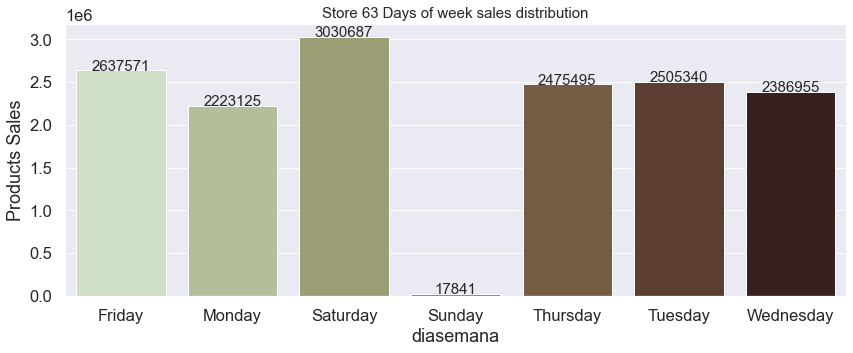

In [6]:
dtview.view_weekly_sales_dist(df_store_63,'63')

Splitting for a 7 days
threshold_date: 
2020-01-24 18:30:00
Completed in: 0.045193748999963645 seconds 

Initial log joint probability = -4.56872
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       8003.22   0.000277526       221.584           1           1      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       8004.79   0.000180112       59.9255           1           1      228   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       8006.01    0.00037079        202.16      0.5912      0.5912      338   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       8007.57    0.00649241       438.967      0.9501      0.9501      453   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       8009.43   0.000375216        29

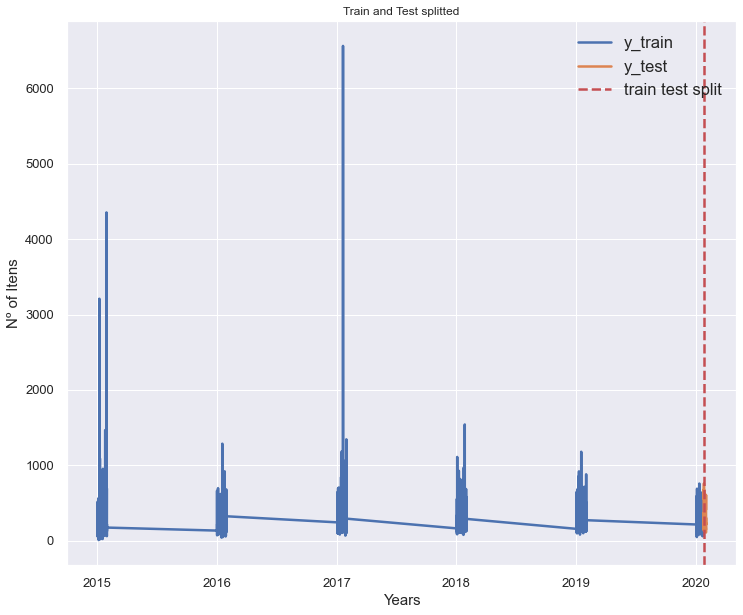

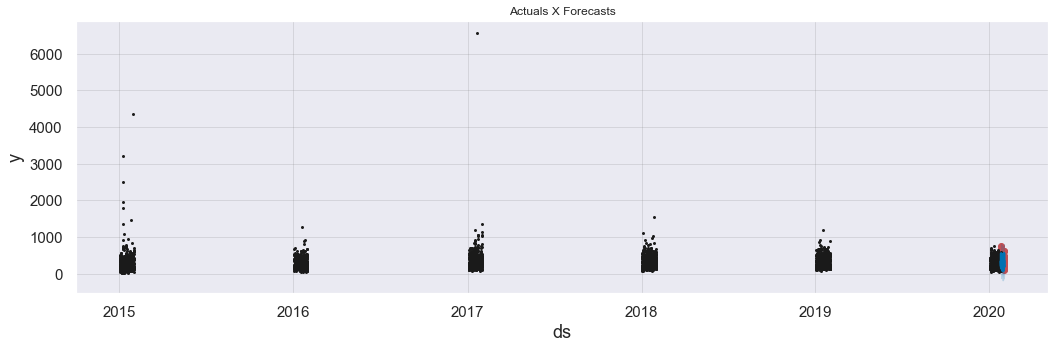

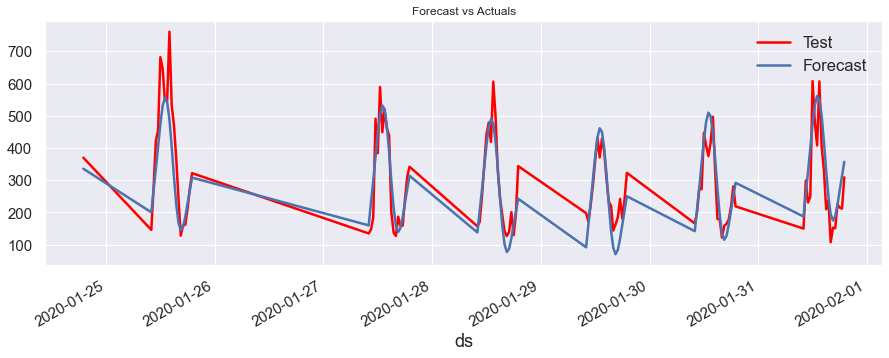

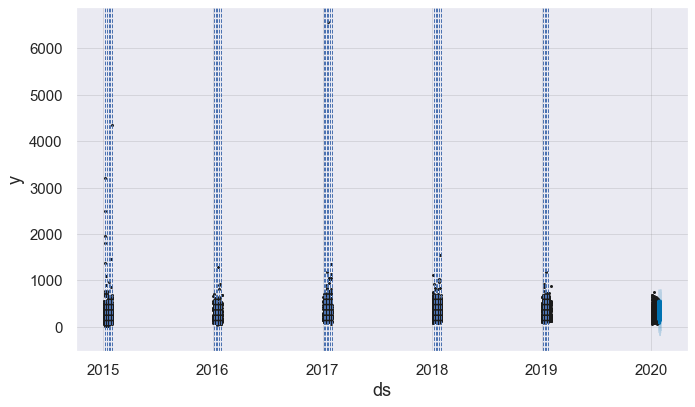

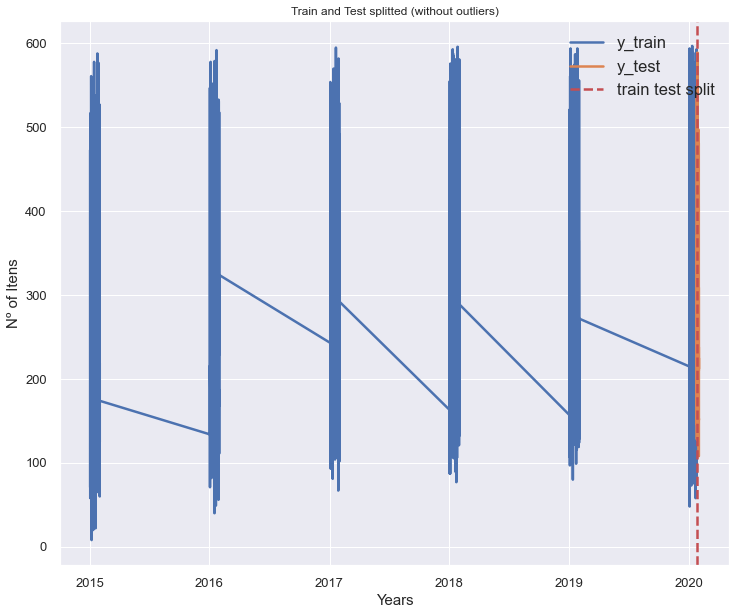

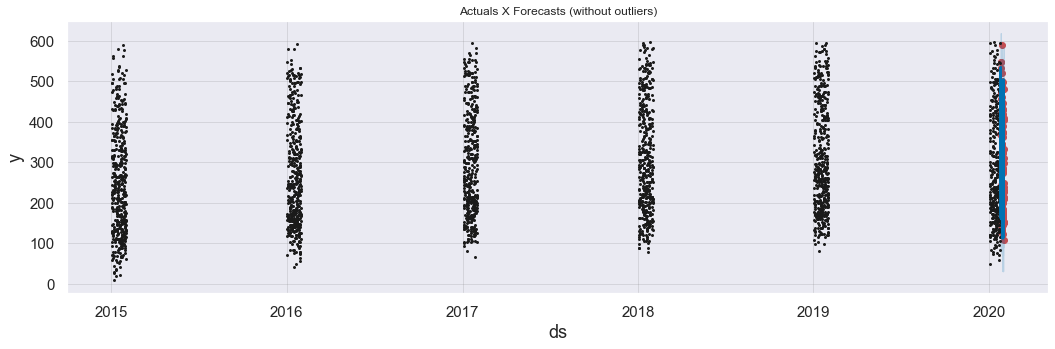

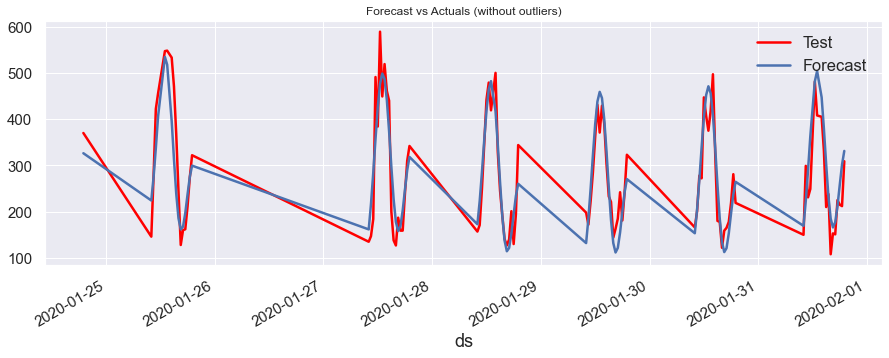

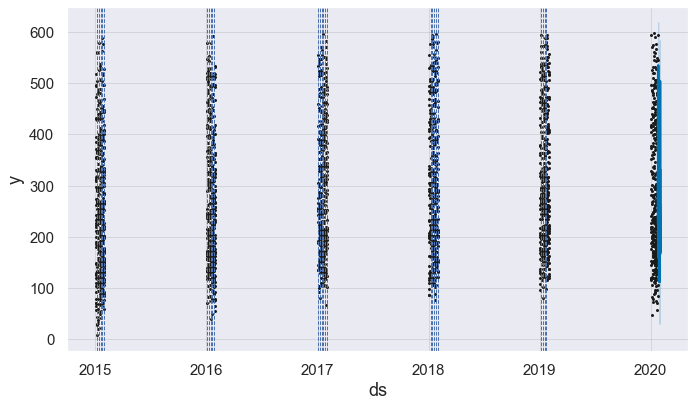

In [18]:
df = pd.read_csv(csvpath + '/datasets/df_63.csv', sep=',')
df['ds'] = pd.DatetimeIndex(df['ds'])
work_hours = ['09','10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21']
store_no = '63'
studied_periods = ['w']
horizons = {'m':'30 days', 'w': '7 days'}
if undesired_column in df.columns:
            df.drop(columns=undesired_column, inplace=True)
df[df['y'] > 0].groupby(df['ds'].dt.hour)['ds'].count()
valid_hours = pd.DataFrame(df[df['y'] > 0].groupby(df['ds'].dt.hour)['ds'].count())
#most_freq_hours = dtview.view_df_hours_distribution(df, store_no)
valid_hours.index.name='hour'
#freq_hours = valid_hours[valid_hours['ds']>= most_freq_hours].index.values
        
if df.shape[0] >= 1500:
    df_entropy=dtexp.get_entropy_analysis(int(store_no))
    for prediction_period in studied_periods:
        df_trn, df_tst, forecast, mdl_prophet_SALE, threshold_date, fcst_period = pfcst.prophet_predict_grp(df, hyperparams=False, train_period=prediction_period)
        print('-----------  Store {} --> Forecasting for {} days in the future ---------------'.format(store_no, fcst_period))
        print(' Train size: \n{} \n Test size: \n{}'.format(df_trn.shape[0], df_tst.shape[0]))
        file_sufix = datetime.datetime.now()
        file_sufix_name=re.sub('[-.: ]', '_', str(file_sufix))
        models.save_model(mdl_prophet_SALE,str(store_no)+'_'+file_sufix_name+'.json')
        model_outlier_file_name = str(store_no)+'_'+file_sufix_name+'.json'
        df_tst_s = df_tst.copy()
        df_tst_s['ds'] = pd.to_datetime(df_tst_s['ds'])
        df_tst_s = df_tst_s.set_index(pd.DatetimeIndex(df_tst_s['ds']))
        df_tst_forecast = mdl_prophet_SALE.predict(df_tst_s)
        df_tst_forecast = dtclean.remove_zero_and_negative(df_tst_forecast, 'yhat')
        if df_tst_forecast.shape[0] < df_tst_s.shape[0]:
            mask = df_tst_s['ds'].isin(df_tst_forecast['ds'])
            df_tst_s = df_tst_s[mask][['ds', 'y']]
        mse = fm.mse(np.array(df_tst_s['y']),np.array(df_tst_forecast['yhat']))
        mape = fm.mape(np.array(df_tst_s['y']),np.array(df_tst_forecast['yhat']))
        mae = fm.mae(np.array(df_tst_s['y']),np.array(df_tst_forecast['yhat']))
        rmse = fm.rmse(np.array(df_tst_s['y']),np.array(df_tst_forecast['yhat']))
        outlier = 0
        #df_tunned = pfcst.prophet_manual_evaluate_parameters(store_no
        #                                                     , df
        #                                                     , horizons[prediction_period]
        #                                                     , outlier
        #                                                     , train_period=prediction_period)
        dtview.plot_train_test_split(df_trn, df_tst_s
                                     , threshold_date=threshold_date
                                     , title='Train and Test splitted')
        dtview.plot_forecast(df_tst_forecast, mdl_prophet_SALE, filename=store_no+'_sl_fcst_test_'
                             , df_test=df_tst_s
                             , title='Actuals X Forecasts')
        dtview.plot_forecast_vs_actuals(df_tst_forecast, df_tst_s
                                        , filename=store_no+'_sl_fcst_test_')
        dtview.plot_prophet_model_changepoints(mdl_prophet_SALE,df_tst_forecast)
        print('================ REMOVING OUTLIERS  STORE {} ====================='.format(store_no))
        # Obtaining the upper and lower fence, which are the outliers interval
        lower_fence, upper_fence = dtexp.compute_iqr(df)
        lower_fence = 1
        df_no_out = df[df['y'].between(lower_fence, int(upper_fence))]
        df_trn_nout, df_tst_nout, df_tst_forecast_nout, mdl_prophet_nout_SALE, threshold_date, fcst_period = pfcst.prophet_predict_grp(df_no_out, hyperparams=False, train_period=prediction_period)
        file_sufix = datetime.datetime.now()
        file_sufix_name=re.sub('[-.: ]', '_', str(file_sufix))
        models.save_model(mdl_prophet_nout_SALE,str(store_no)+'_'+file_sufix_name+'.json')
        model_without_outlier_file_name = str(store_no)+'_'+file_sufix_name+'.json'

        df_tst_nout_s = df_tst_nout.copy()
        df_tst_nout_s['ds'] = pd.to_datetime(df_tst_nout_s['ds'])
        df_tst_nout_s = df_tst_nout_s.set_index(pd.DatetimeIndex(df_tst_nout_s['ds']))
        df_tst_forecast_nout_s = mdl_prophet_nout_SALE.predict(df_tst_nout_s)
        df_tst_forecast_nout_s = dtclean.remove_zero_and_negative(df_tst_forecast_nout_s, 'yhat')

        if df_tst_forecast_nout_s.shape[0] < df_tst_nout_s.shape[0]:
            mask = df_tst_nout_s['ds'].isin(df_tst_forecast_nout_s['ds'])
            df_tst_nout_s = df_tst_nout_s[mask][['ds', 'y']]

        mse_out =  fm.mse(np.array(df_tst_nout_s['y']),np.array(df_tst_forecast_nout_s['yhat']))
        mape_out = fm.mape(np.array(df_tst_nout_s['y']),np.array(df_tst_forecast_nout_s['yhat']))
        mae_out = fm.mae(np.array(df_tst_nout_s['y']),np.array(df_tst_forecast_nout_s['yhat']))
        rmse_out = fm.rmse(np.array(df_tst_nout_s['y']),np.array(df_tst_forecast_nout_s['yhat']))
        outlier = 1
        #df_tunned_out = pfcst.prophet_manual_evaluate_parameters(store_no
        #                                                         , df_no_out
        #                                                         , horizons[prediction_period]
        #                                                         , outlier
        #                                                         , train_period=prediction_period)
        #dtview.plot_train_test_split(df_trn_nout, df_tst_nout_s
        #                             , threshold_date=threshold_date
        #                             , title='Train and Test splitted (without outliers)')
        #dtview.plot_forecast(df_tst_forecast_nout_s, mdl_prophet_nout_SALE
        #                     , filename=store_no+'_sl_nout_fcst_test_'
        #                     , df_test=df_tst_nout_s
        #                     , title='Actuals X Forecasts (without outliers)')
        dtview.plot_forecast_vs_actuals(df_tst_forecast_nout_s, df_tst_nout_s
                                        , filename=store_no+'_sl_nout_fcst_vs_actuals_'
                                        , titlecomplement=' (without outliers)')
        dtview.plot_prophet_model_changepoints(mdl_prophet_nout_SALE,df_tst_forecast_nout_s)

<div class="alert alert-block alert-info">
<b> Mape 20.26 %
</div>

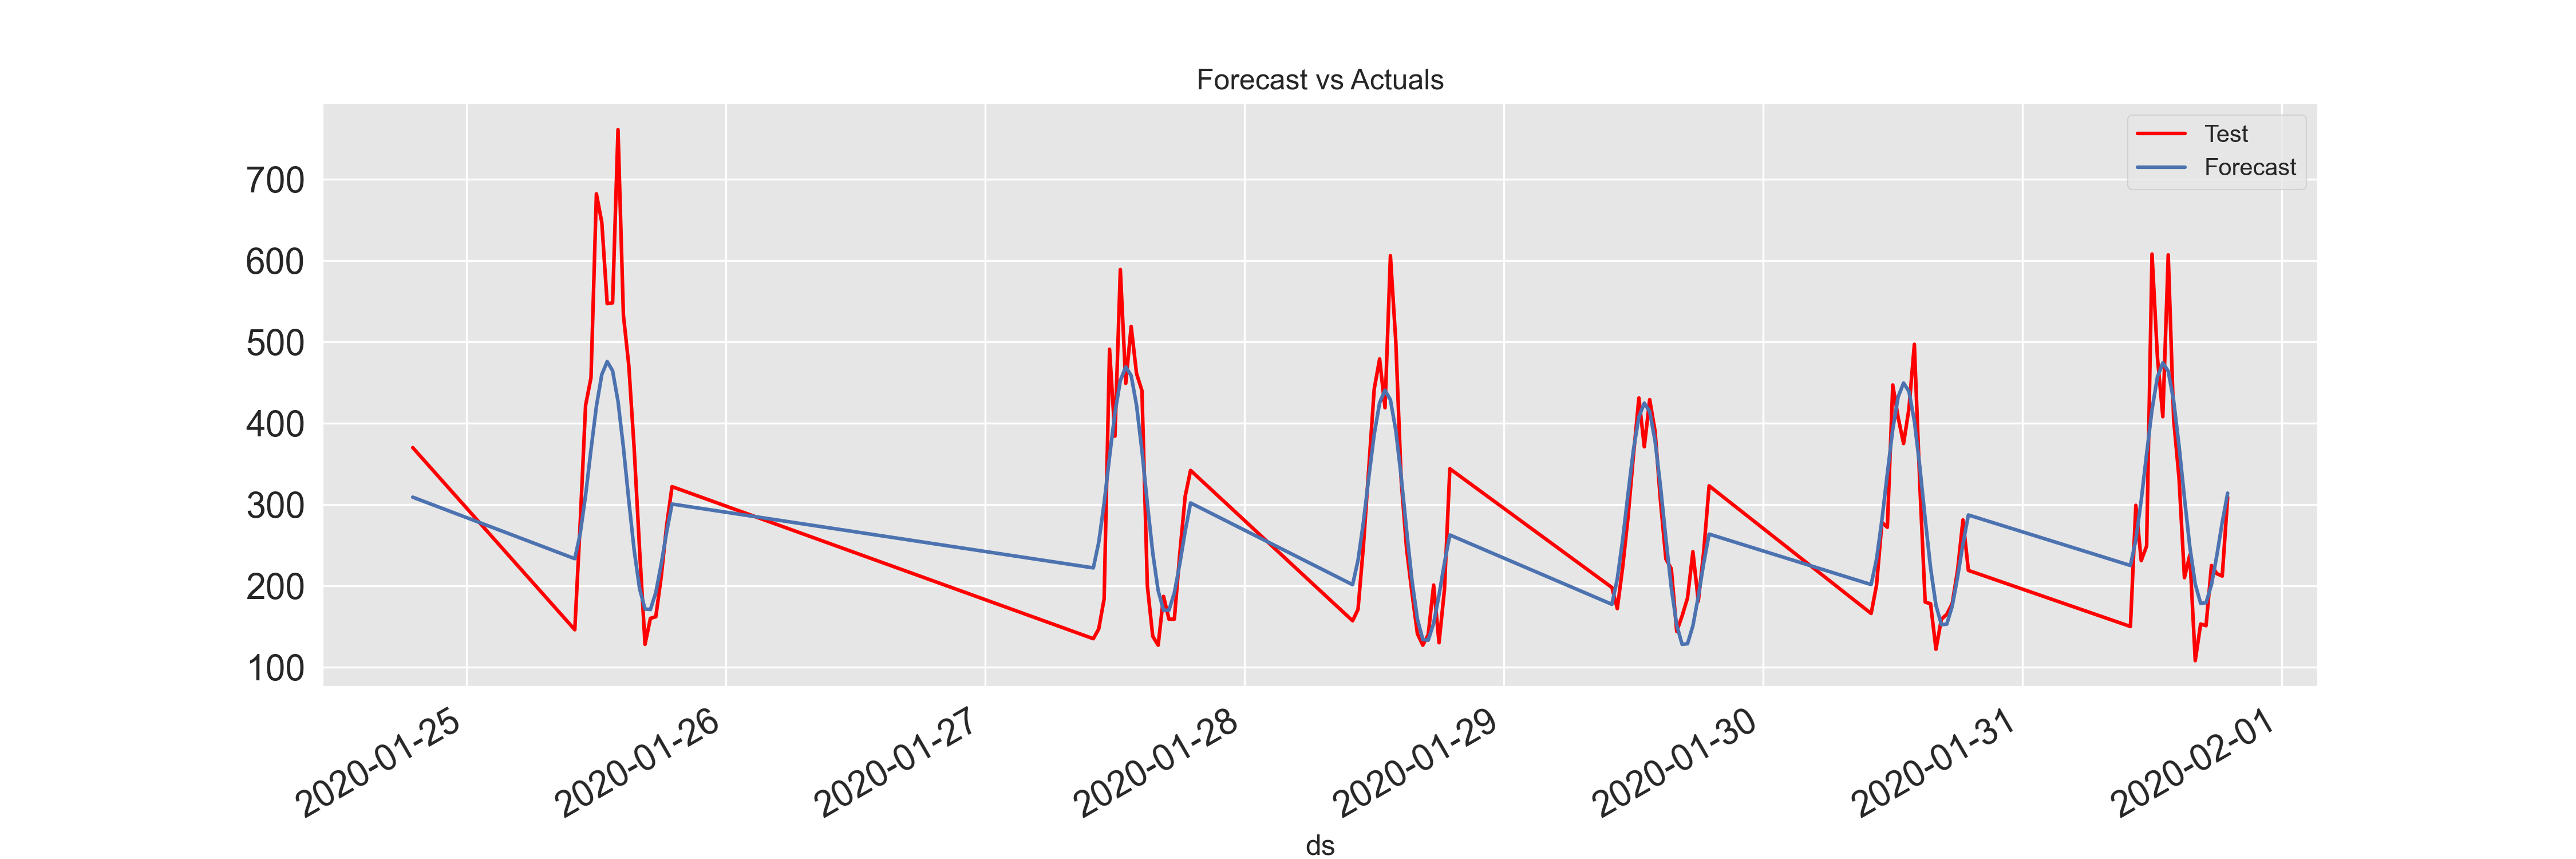

In [20]:
Image(imgpath+"63_sl_fcst_test_2021-09-28T14_28_14.png", width=2400, height=2400)

<div class="alert alert-block alert-info">
<b>  A week prediction without outliers and with hyper-parameters adjusts
<b>  Mape 16.99 %
</div>

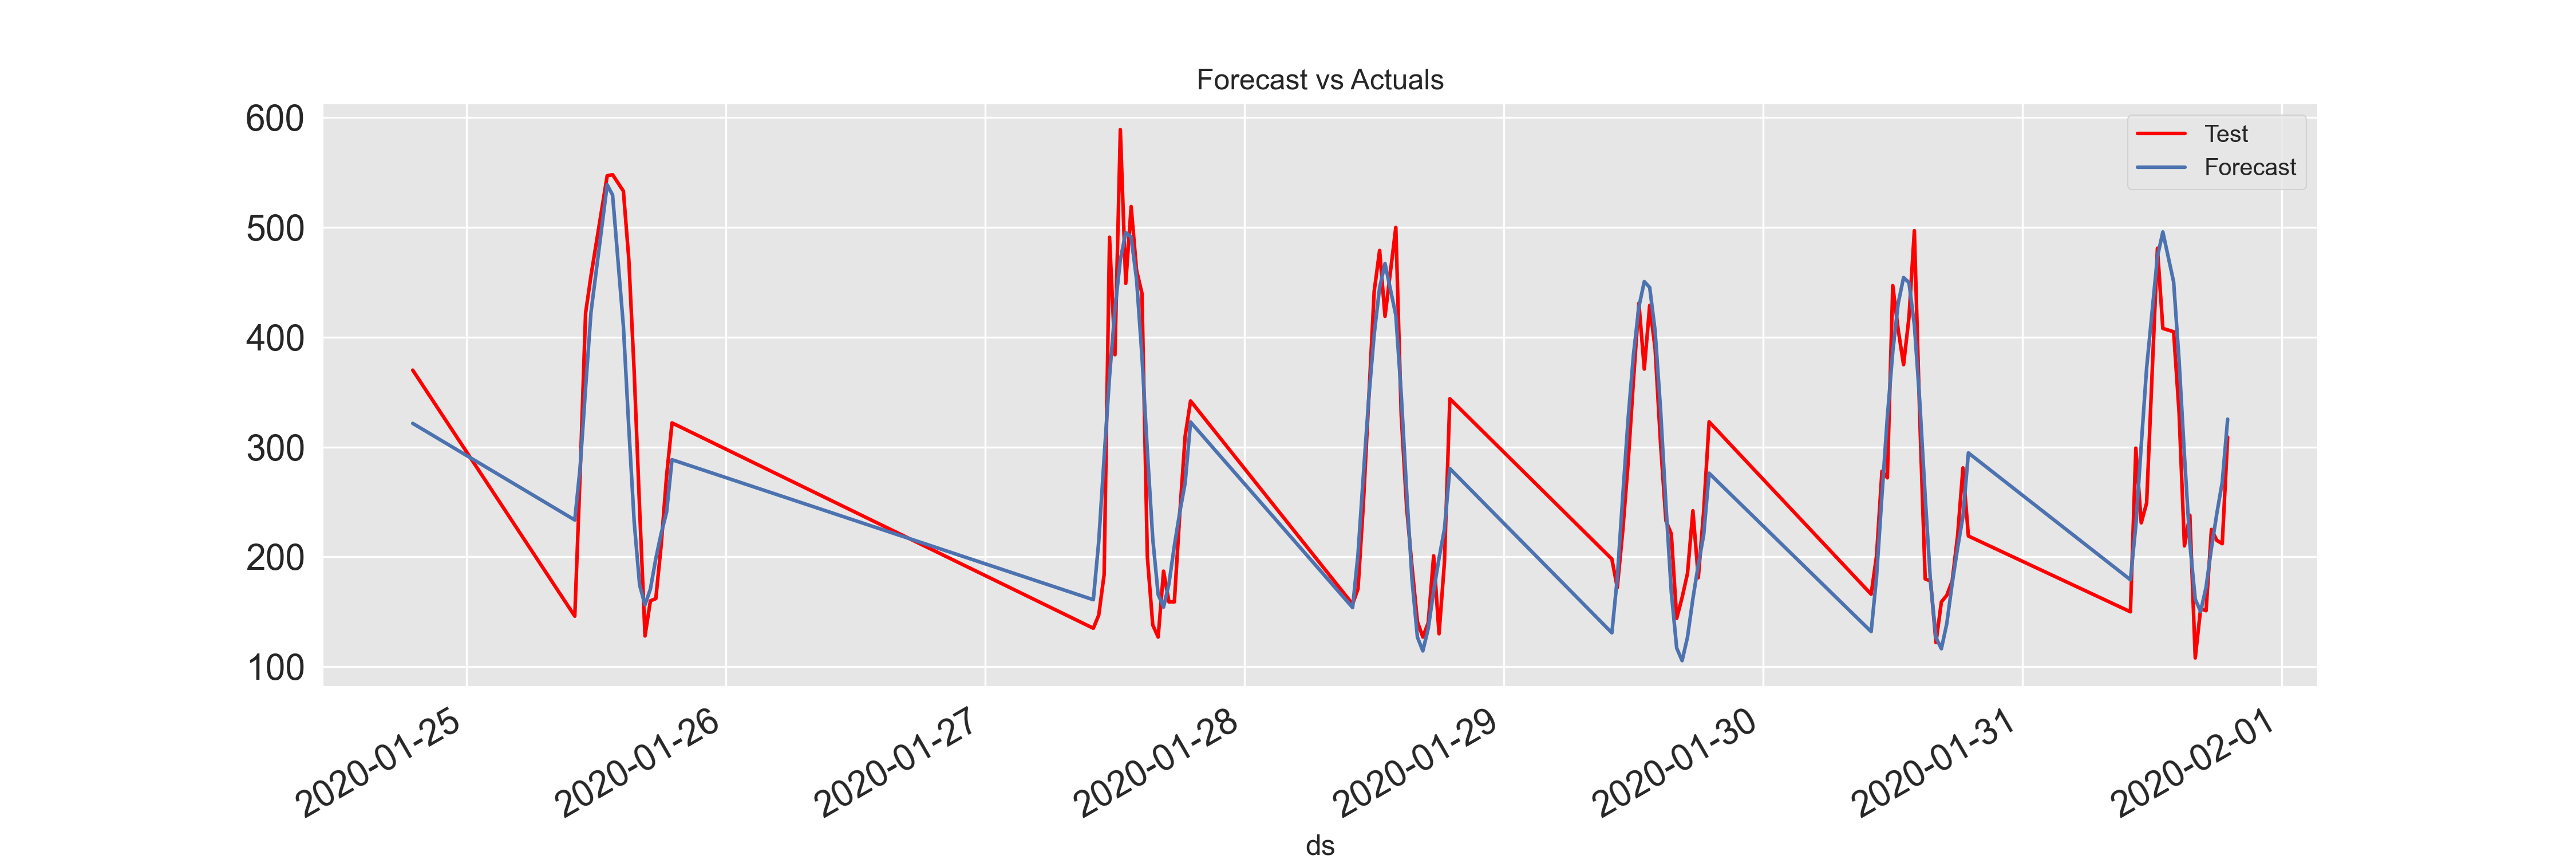

In [21]:
Image(imgpath+"63_sl_nout_fcst_vs_actuals_2021-09-28T15_13_49.png", width=2400, height=2400) 

<div class="alert alert-block alert-info">
<b>Analyzing store 11
</div>

<module 'matplotlib.pyplot' from '/usr/local/Caskroom/miniconda/base/envs/venvsisqual2/lib/python3.9/site-packages/matplotlib/pyplot.py'>

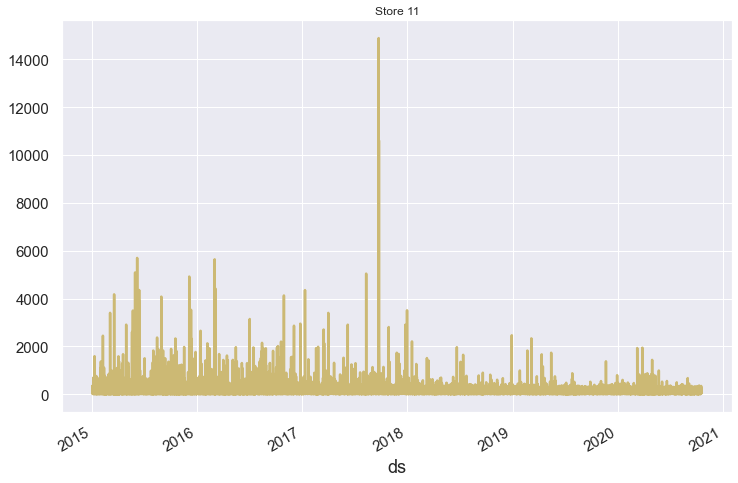

In [11]:
df_store_11 = df_non_negative_test.query('store == 11')
dtview.plot_timeseries(df_store_11,'Store 11',color[5])

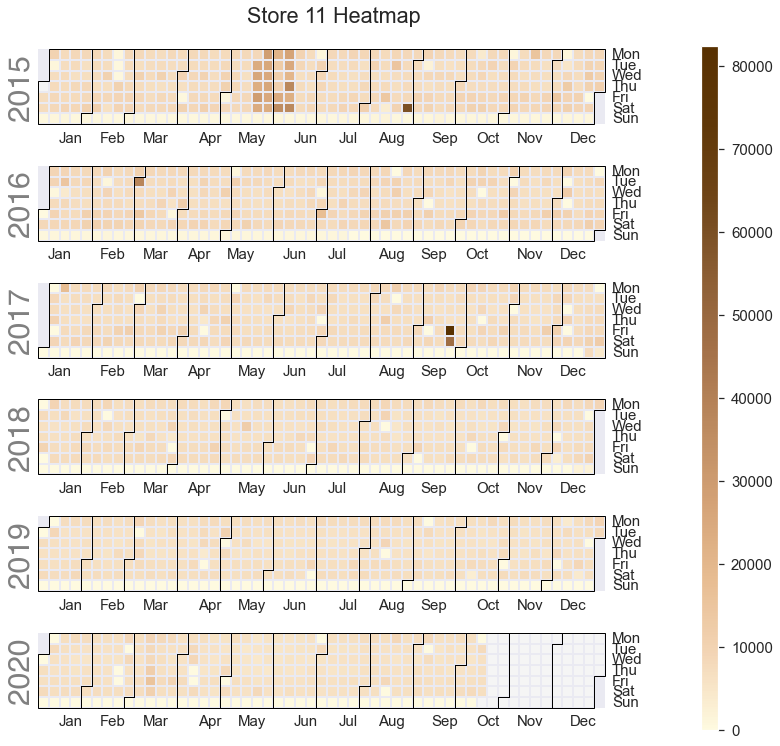

In [12]:
dtview.plot_heatmap(df_store_11,store=11, highlight_month='black')

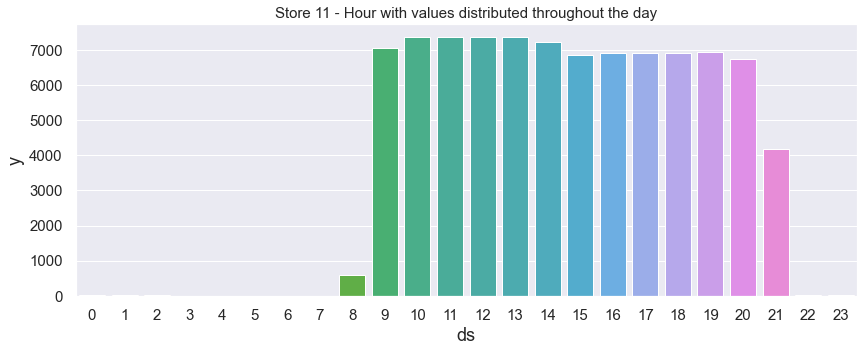

In [13]:
store_no = '11'
df_store_11.reset_index(level=0,inplace=True)
df_store_11['ds'] = pd.DatetimeIndex(df_store_11['ds'])
if undesired_column in df.columns:
    df_store_11.drop(columns=undesired_column, inplace=True)
df_store_11[df_store_11['y'] > 0].groupby(df_store_11['ds'].dt.hour)['ds'].count()
most_freq_hours = dtview.view_df_hours_distribution(df_store_11, store_no)

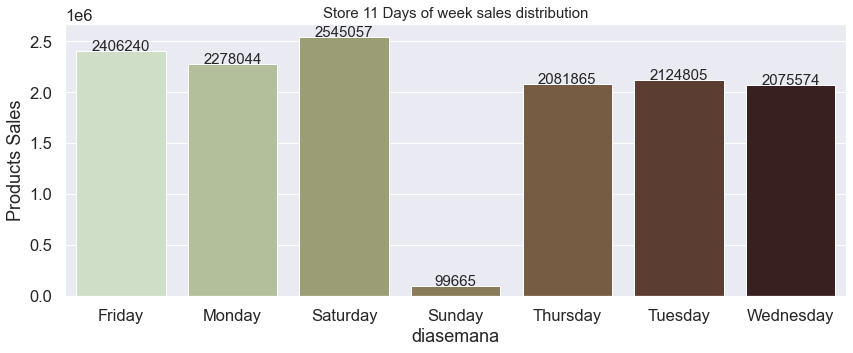

In [14]:
df_store_11.reset_index(level=0, inplace=True)
dtview.view_weekly_sales_dist(df_store_11,'11')


# Forecasting with Prophet

Splitting for a 30 days
threshold_date: 
2020-01-31 19:00:00
Completed in: 0.20451756799997156 seconds 

Initial log joint probability = -14.2506
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7219.56    0.00103708       200.896           1           1      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7221.64    0.00145274       158.436           1           1      222   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       7222.58    0.00402592       193.678           1           1      336   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       7227.32   0.000588082       198.338           1           1      448   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       7229.23   0.000622027       224

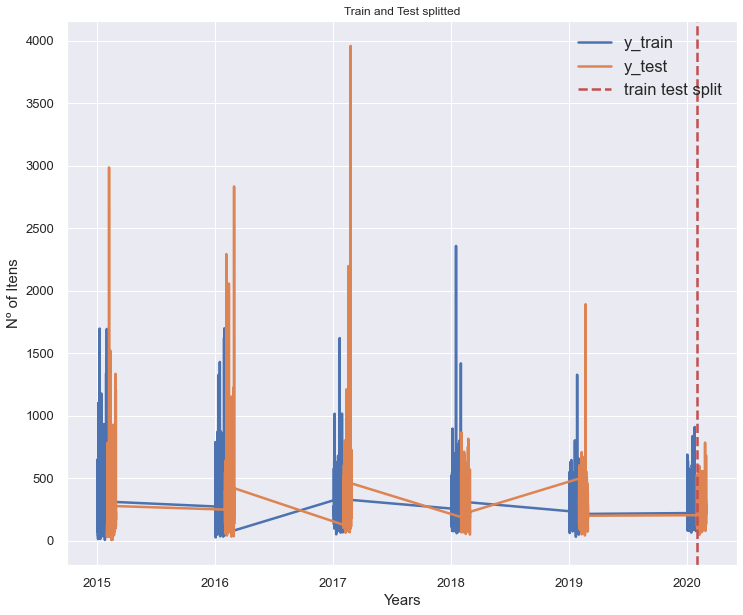

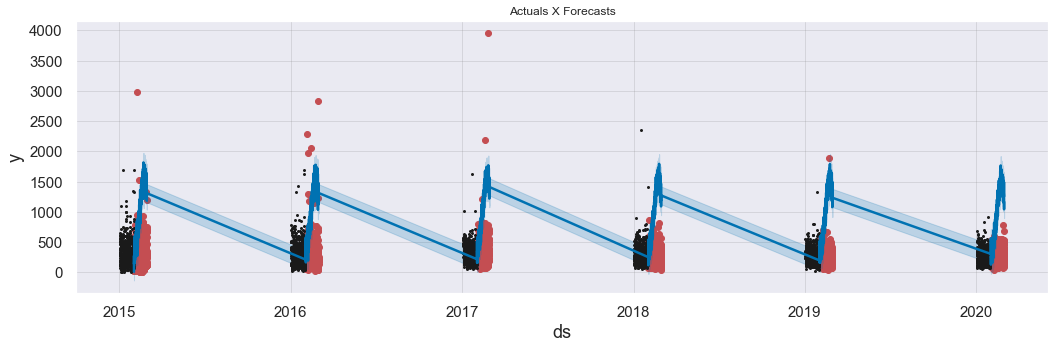

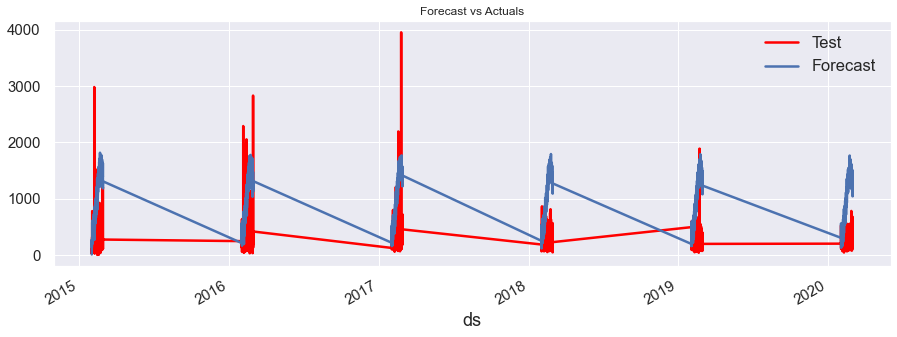

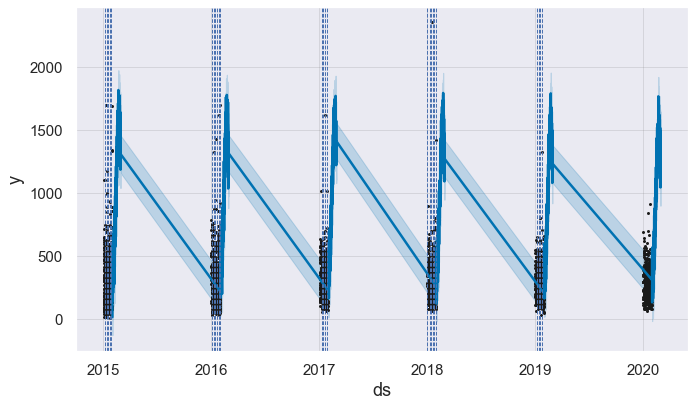

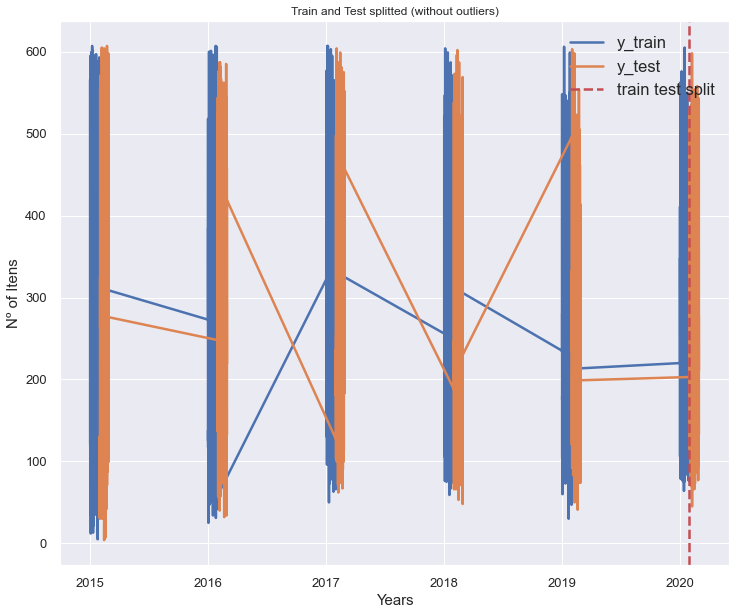

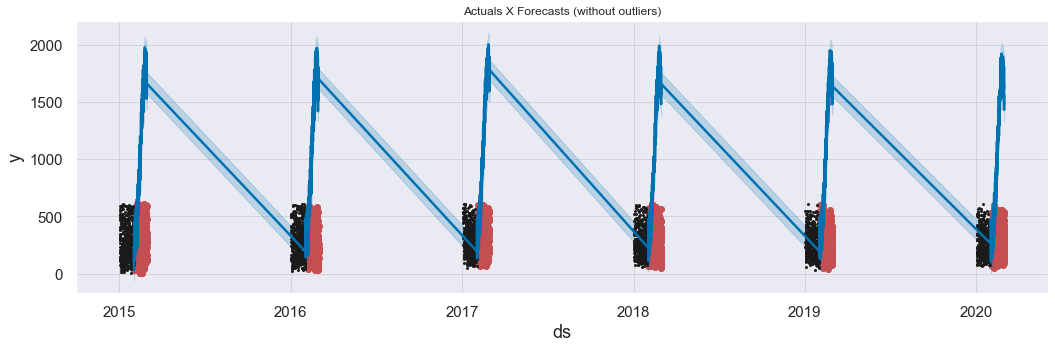

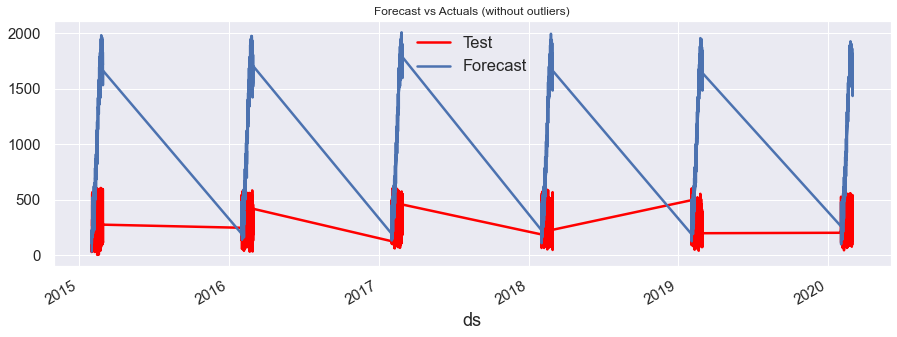

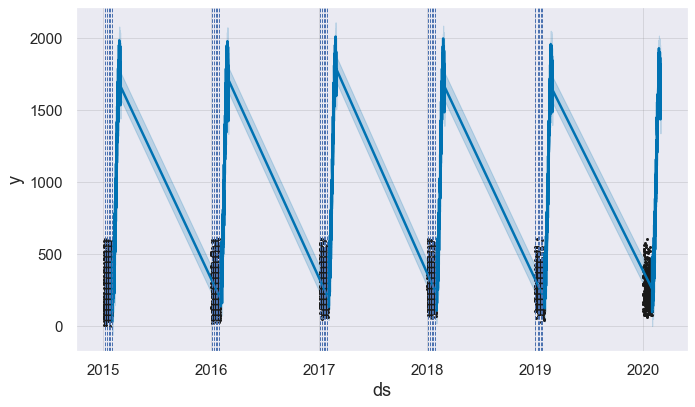

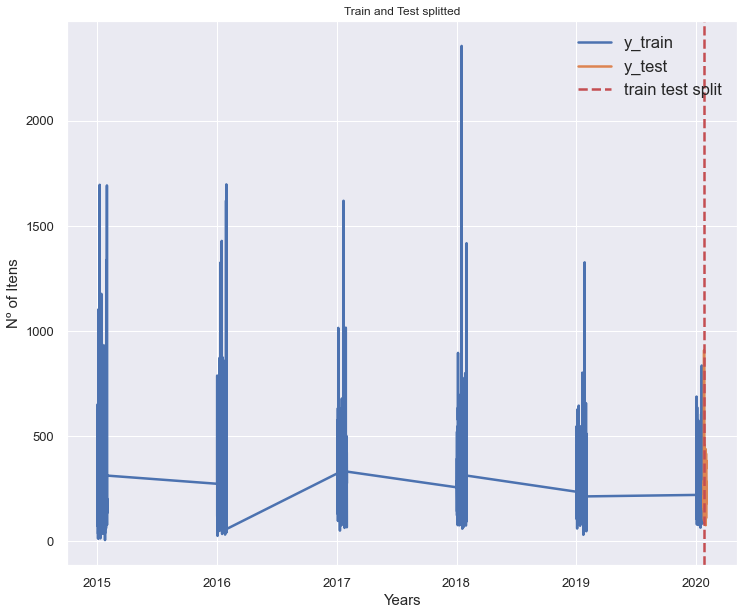

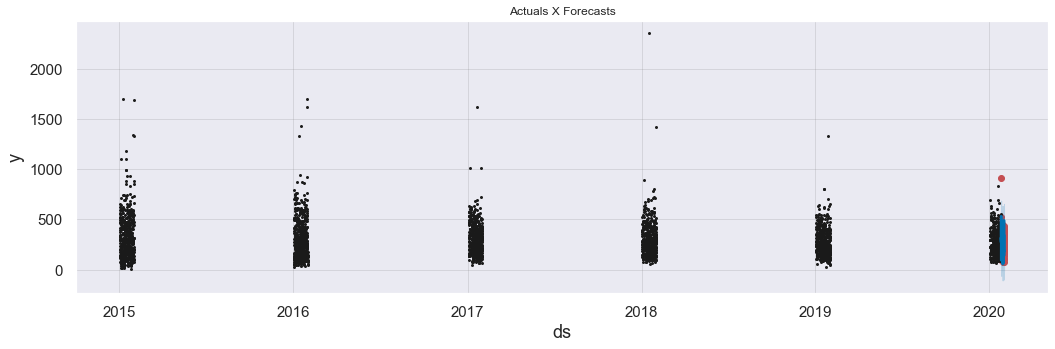

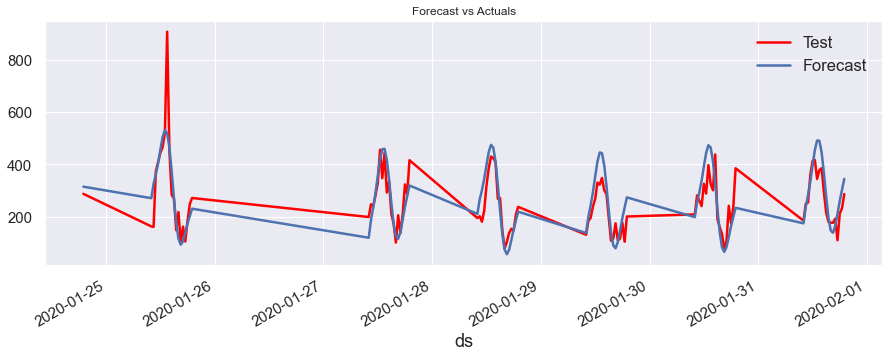

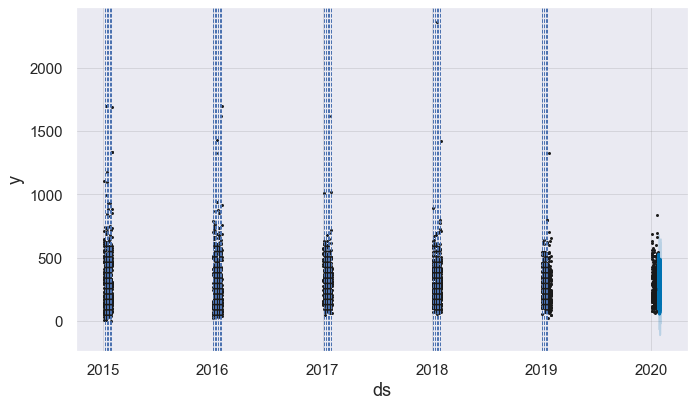

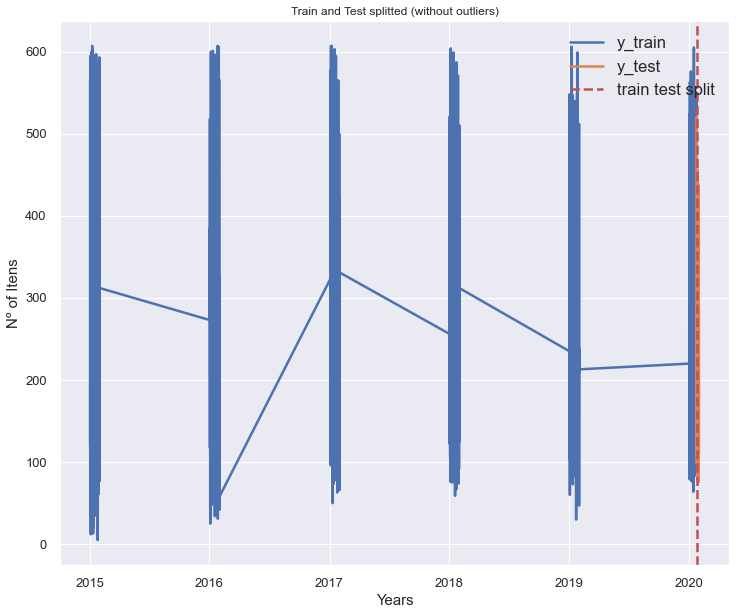

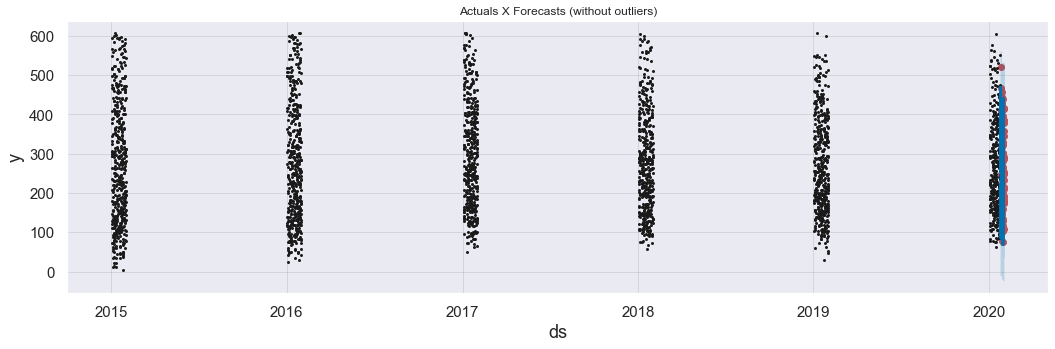

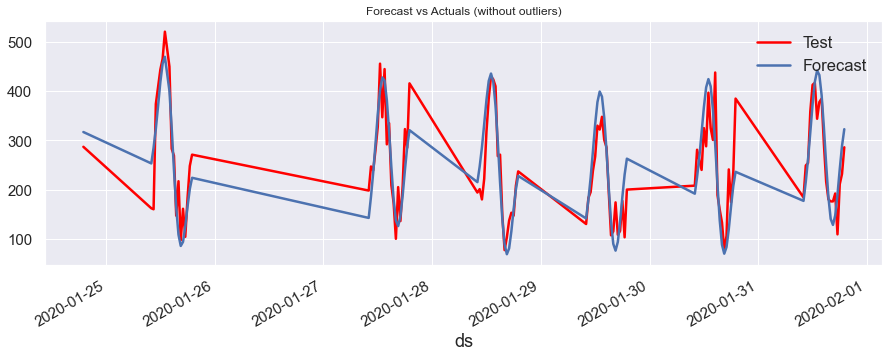

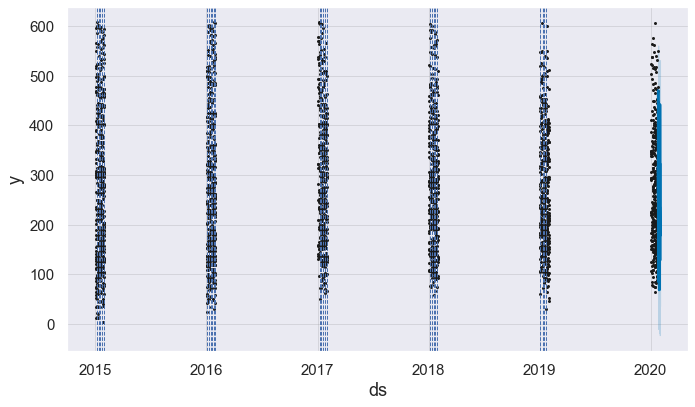

In [15]:
df = pd.read_csv(csvpath + '/datasets/df_11.csv', sep=',')
df['ds'] = pd.DatetimeIndex(df['ds'])
work_hours = ['09','10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21']
store_no = '11'
studied_periods = ['w']
horizons = {'m':'30 days', 'w': '7 days'}
if undesired_column in df.columns:
            df.drop(columns=undesired_column, inplace=True)
df[df['y'] > 0].groupby(df['ds'].dt.hour)['ds'].count()
valid_hours = pd.DataFrame(df[df['y'] > 0].groupby(df['ds'].dt.hour)['ds'].count())
#most_freq_hours = dtview.view_df_hours_distribution(df, store_no)
valid_hours.index.name='hour'
#freq_hours = valid_hours[valid_hours['ds']>= most_freq_hours].index.values
        
if df.shape[0] >= 1500:
    df_entropy=dtexp.get_entropy_analysis(int(store_no))
    for prediction_period in studied_periods:
        df_trn, df_tst, forecast, mdl_prophet_SALE, threshold_date, fcst_period = pfcst.prophet_predict_grp(df, hyperparams=False, train_period=prediction_period)
        print('-----------  Store {} --> Forecasting for {} days in the future ---------------'.format(store_no, fcst_period))
        print(' Train size: \n{} \n Test size: \n{}'.format(df_trn.shape[0], df_tst.shape[0]))
        file_sufix = datetime.datetime.now()
        file_sufix_name=re.sub('[-.: ]', '_', str(file_sufix))
        models.save_model(mdl_prophet_SALE,str(store_no)+'_'+file_sufix_name+'.json')
        model_outlier_file_name = str(store_no)+'_'+file_sufix_name+'.json'
        df_tst_s = df_tst.copy()
        df_tst_s['ds'] = pd.to_datetime(df_tst_s['ds'])
        df_tst_s = df_tst_s.set_index(pd.DatetimeIndex(df_tst_s['ds']))
        df_tst_forecast = mdl_prophet_SALE.predict(df_tst_s)
        df_tst_forecast = dtclean.remove_zero_and_negative(df_tst_forecast, 'yhat')
        if df_tst_forecast.shape[0] < df_tst_s.shape[0]:
            mask = df_tst_s['ds'].isin(df_tst_forecast['ds'])
            df_tst_s = df_tst_s[mask][['ds', 'y']]
        mse = fm.mse(np.array(df_tst_s['y']),np.array(df_tst_forecast['yhat']))
        mape = fm.mape(np.array(df_tst_s['y']),np.array(df_tst_forecast['yhat']))
        mae = fm.mae(np.array(df_tst_s['y']),np.array(df_tst_forecast['yhat']))
        rmse = fm.rmse(np.array(df_tst_s['y']),np.array(df_tst_forecast['yhat']))
        outlier = 0
        #df_tunned = pfcst.prophet_manual_evaluate_parameters(store_no
        #                                                     , df
        #                                                     , horizons[prediction_period]
        #                                                     , outlier
        #                                                     , train_period=prediction_period)
        dtview.plot_train_test_split(df_trn, df_tst_s
                                     , threshold_date=threshold_date
                                     , title='Train and Test splitted')
        dtview.plot_forecast(df_tst_forecast, mdl_prophet_SALE, filename=store_no+'_sl_fcst_test_'
                             , df_test=df_tst_s
                             , title='Actuals X Forecasts')
        dtview.plot_forecast_vs_actuals(df_tst_forecast, df_tst_s
                                        , filename=store_no+'_sl_fcst_test_')
        dtview.plot_prophet_model_changepoints(mdl_prophet_SALE,df_tst_forecast)
        print('================ REMOVING OUTLIERS  STORE {} ====================='.format(store_no))
        # Obtaining the upper and lower fence, which are the outliers interval
        lower_fence, upper_fence = dtexp.compute_iqr(df)
        lower_fence = 1
        df_no_out = df[df['y'].between(lower_fence, int(upper_fence))]
        df_trn_nout, df_tst_nout, df_tst_forecast_nout, mdl_prophet_nout_SALE, threshold_date, fcst_period = pfcst.prophet_predict_grp(df_no_out, hyperparams=False, train_period=prediction_period)
        file_sufix = datetime.datetime.now()
        file_sufix_name=re.sub('[-.: ]', '_', str(file_sufix))
        models.save_model(mdl_prophet_nout_SALE,str(store_no)+'_'+file_sufix_name+'.json')
        model_without_outlier_file_name = str(store_no)+'_'+file_sufix_name+'.json'

        df_tst_nout_s = df_tst_nout.copy()
        df_tst_nout_s['ds'] = pd.to_datetime(df_tst_nout_s['ds'])
        df_tst_nout_s = df_tst_nout_s.set_index(pd.DatetimeIndex(df_tst_nout_s['ds']))
        df_tst_forecast_nout_s = mdl_prophet_nout_SALE.predict(df_tst_nout_s)
        df_tst_forecast_nout_s = dtclean.remove_zero_and_negative(df_tst_forecast_nout_s, 'yhat')

        if df_tst_forecast_nout_s.shape[0] < df_tst_nout_s.shape[0]:
            mask = df_tst_nout_s['ds'].isin(df_tst_forecast_nout_s['ds'])
            df_tst_nout_s = df_tst_nout_s[mask][['ds', 'y']]

        mse_out =  fm.mse(np.array(df_tst_nout_s['y']),np.array(df_tst_forecast_nout_s['yhat']))
        mape_out = fm.mape(np.array(df_tst_nout_s['y']),np.array(df_tst_forecast_nout_s['yhat']))
        mae_out = fm.mae(np.array(df_tst_nout_s['y']),np.array(df_tst_forecast_nout_s['yhat']))
        rmse_out = fm.rmse(np.array(df_tst_nout_s['y']),np.array(df_tst_forecast_nout_s['yhat']))
        outlier = 1
        #df_tunned_out = pfcst.prophet_manual_evaluate_parameters(store_no
        #                                                         , df_no_out
        #                                                         , horizons[prediction_period]
        #                                                         , outlier
        #                                                         , train_period=prediction_period)
        dtview.plot_train_test_split(df_trn_nout, df_tst_nout_s
                                     , threshold_date=threshold_date
                                     , title='Train and Test splitted (without outliers)')
        dtview.plot_forecast(df_tst_forecast_nout_s, mdl_prophet_nout_SALE
                             , filename=store_no+'_sl_nout_fcst_test_'
                             , df_test=df_tst_nout_s
                             , title='Actuals X Forecasts (without outliers)')
        dtview.plot_forecast_vs_actuals(df_tst_forecast_nout_s, df_tst_nout_s
                                        , filename=store_no+'_sl_nout_fcst_test_'
                                        , titlecomplement=' (without outliers)')
        dtview.plot_prophet_model_changepoints(mdl_prophet_nout_SALE,df_tst_forecast_nout_s)

# Store 29

<module 'matplotlib.pyplot' from '/usr/local/Caskroom/miniconda/base/envs/venvsisqual2/lib/python3.9/site-packages/matplotlib/pyplot.py'>

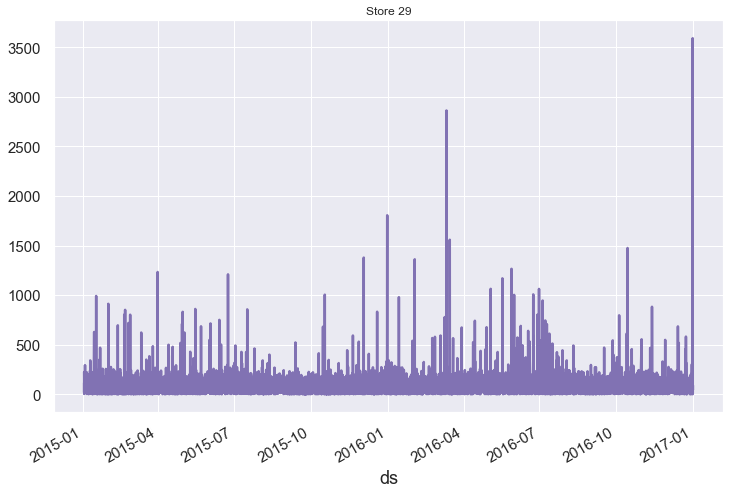

In [16]:
df_store_29 = df_non_negative_test.query('store == 29')
dtview.plot_timeseries(df_store_29,'Store 29',color[4])

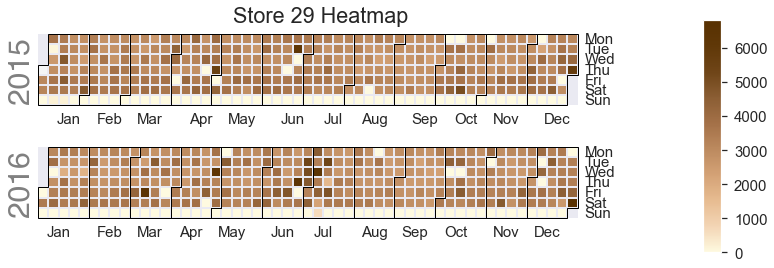

In [17]:
dtview.plot_heatmap(df_store_29,store=29, highlight_month='black')

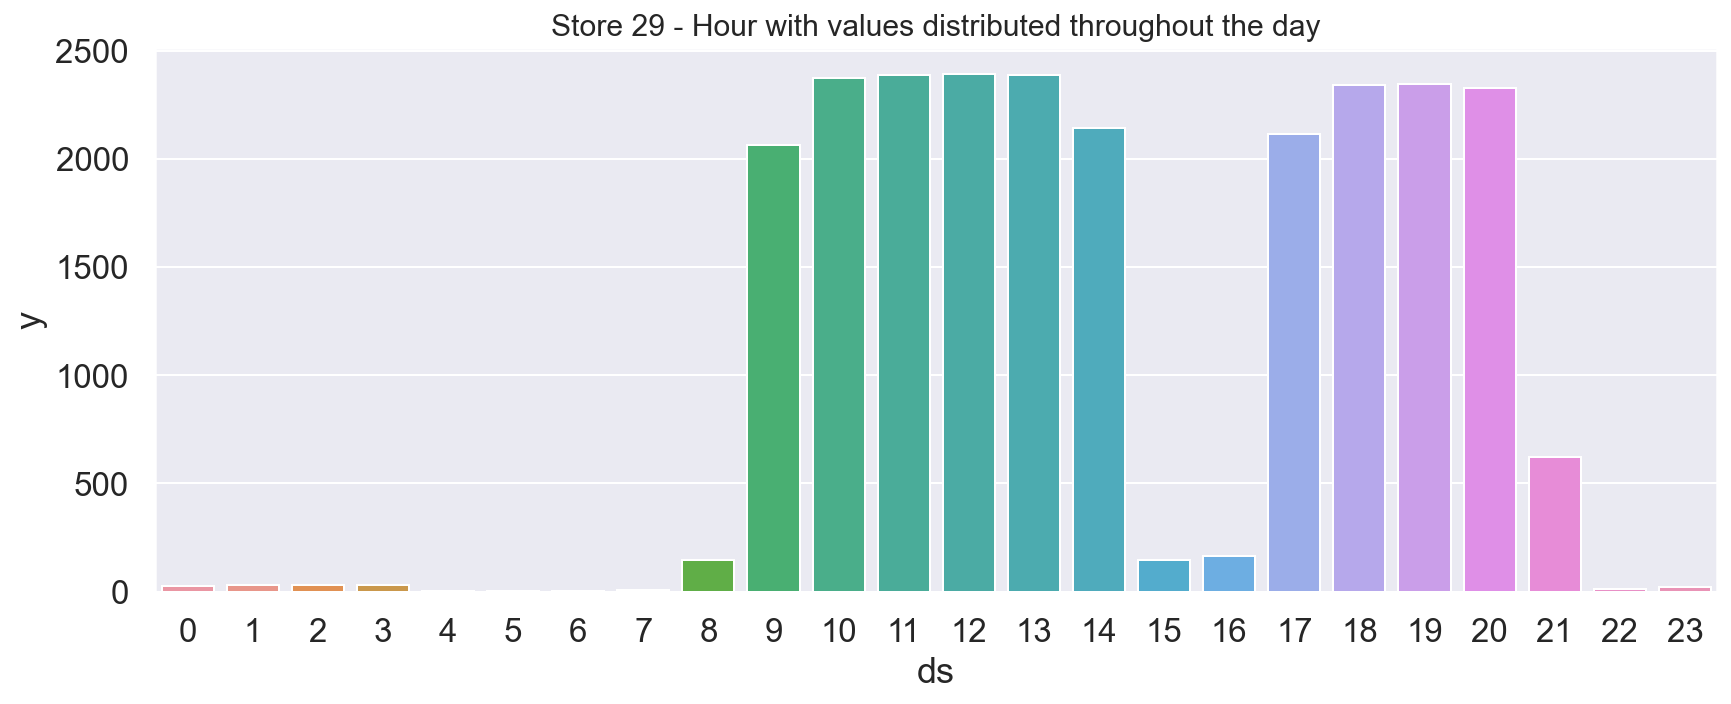

In [29]:
store_no = '29'
df_store_29.reset_index(level=0,inplace=True)
df_store_29['ds'] = pd.DatetimeIndex(df_store_29['ds'])
if undesired_column in df.columns:
    df_store_29.drop(columns=undesired_column, inplace=True)
df_store_29[df_store_29['y'] > 0].groupby(df_store_29['ds'].dt.hour)['ds'].count()
most_freq_hours = dtview.view_df_hours_distribution(df_store_29, store_no)

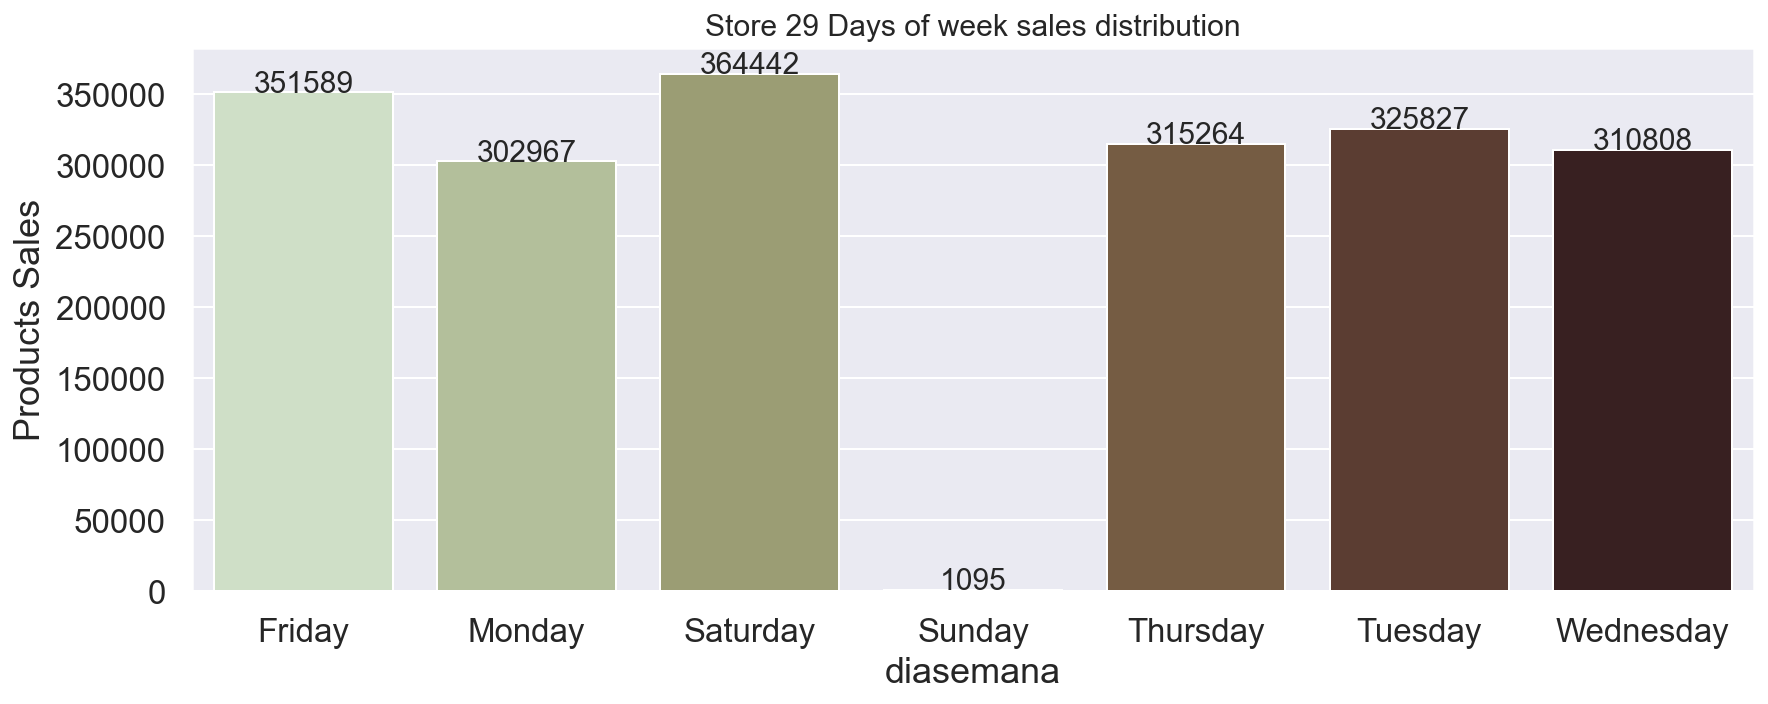

In [28]:
df_store_29.reset_index(level=0,inplace=True)
dtview.view_weekly_sales_dist(df_store_29,'29')

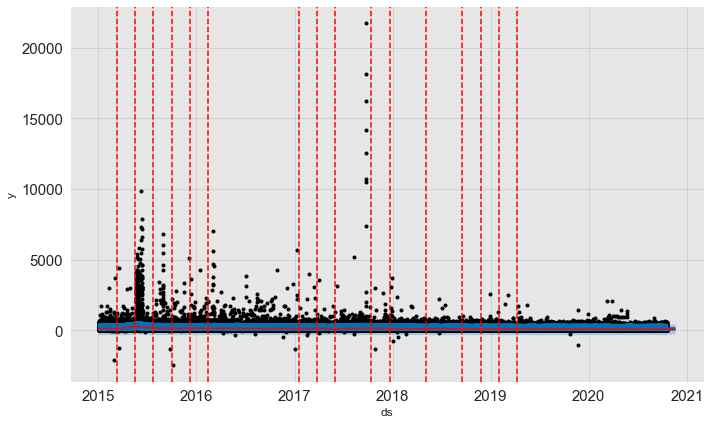

In [ ]:
dtview.plot_added_changepoints(model,forecast)

Splitting for a 30 days
threshold_date: 
2020-01-31 19:00:00
Completed in: 0.037955447000058484 seconds 

Initial log joint probability = -3.43529
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1329.18   0.000510599       82.7768      0.9853      0.9853      110   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1330.85   0.000372351       59.2427      0.7753      0.7753      228   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     245        1330.9   6.23008e-05       42.4511   1.431e-06       0.001      323  LS failed, Hessian reset 
     268        1330.9   6.96612e-08       36.4566      0.3238      0.3238      352   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
Completed in: 6.137283471000046 seconds 

-----------  Store 4955 --> Forecasting for 30 days in th

SystemError: <class 'stanfit4anon_model_dfdaf2b8ece8a02eb11f050ec701c0ec_2071243031483950351.PyStanHolder'> returned a result with an error set

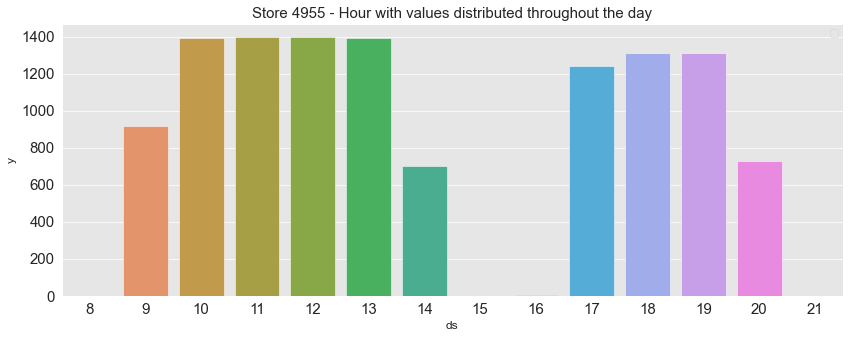

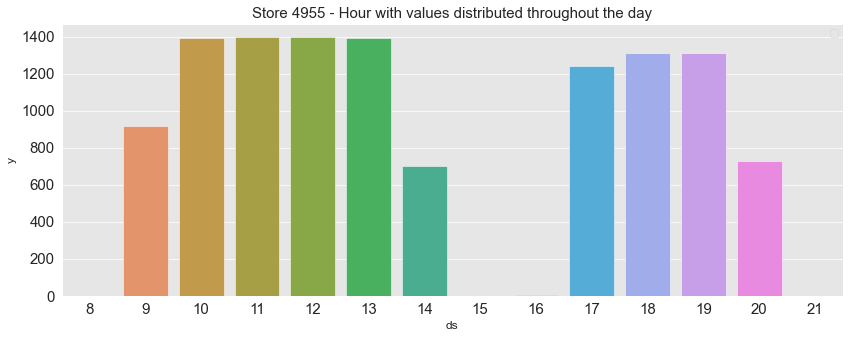

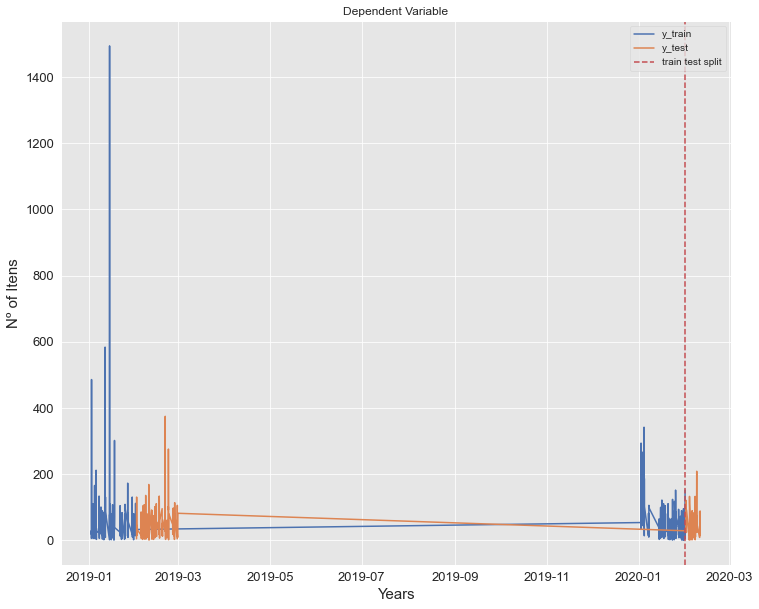

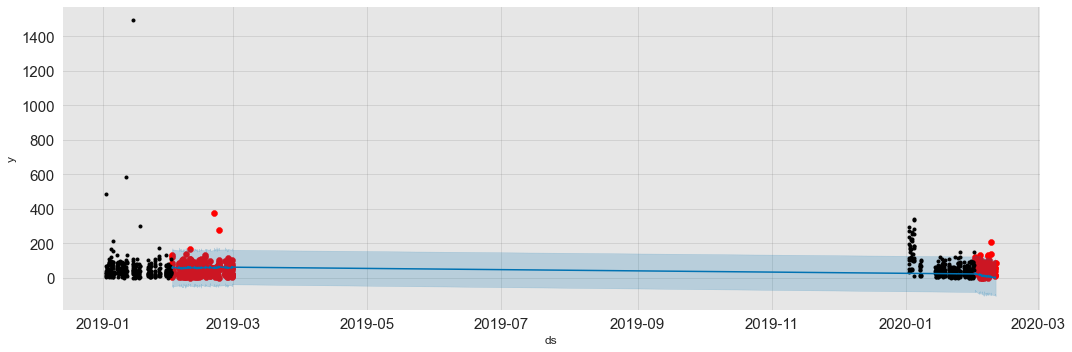

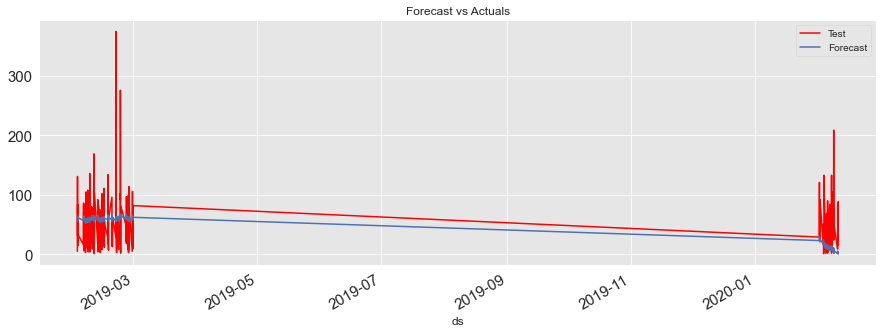

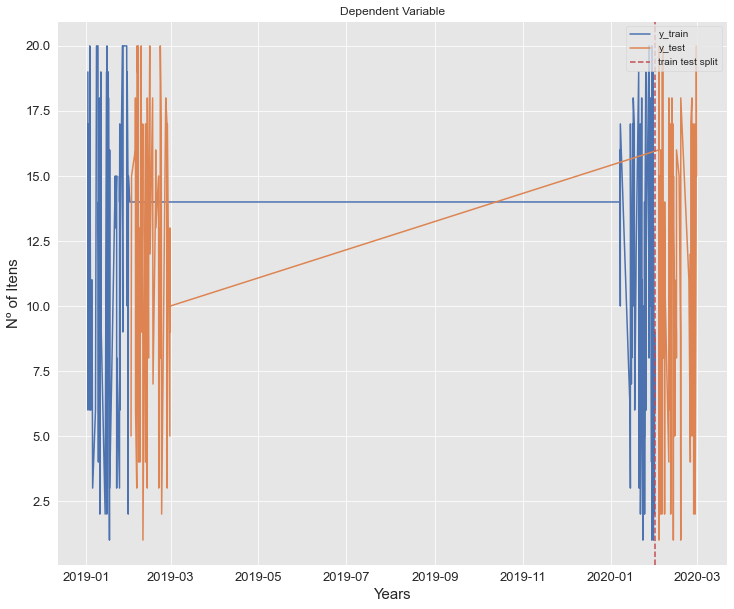

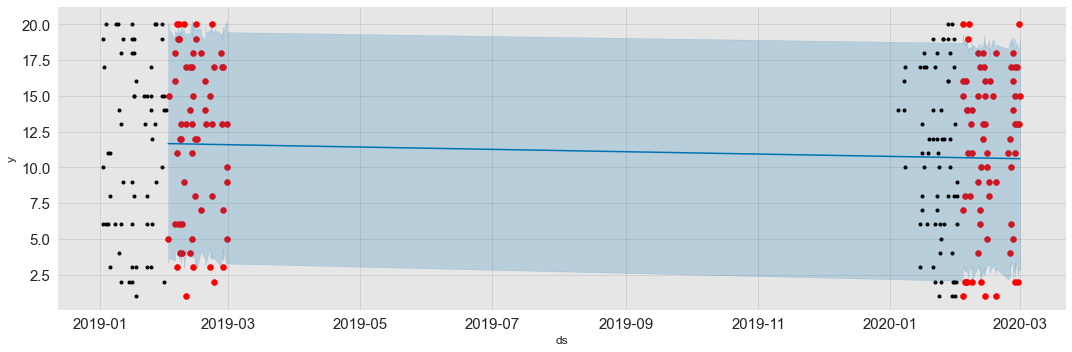

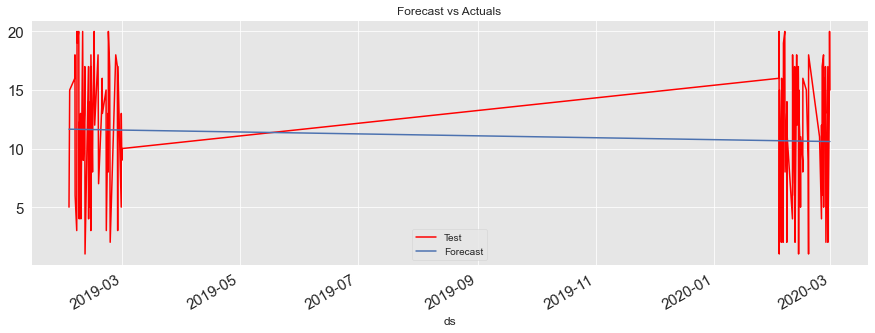

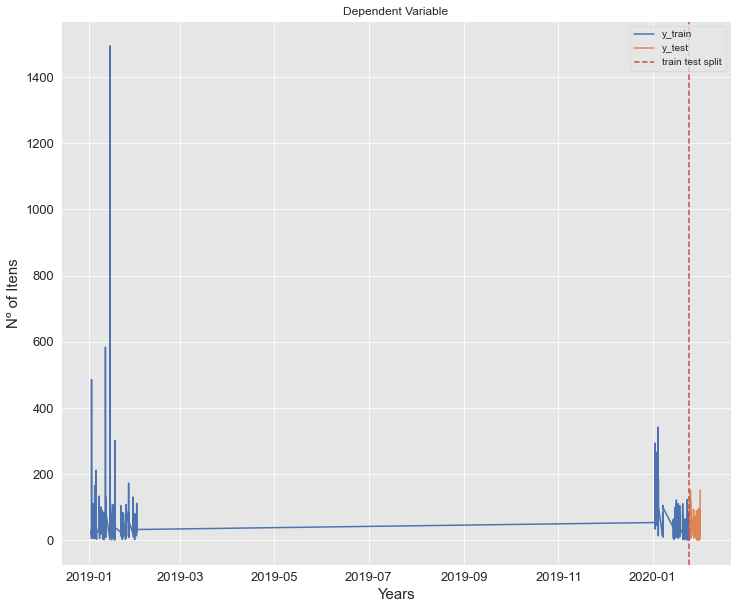

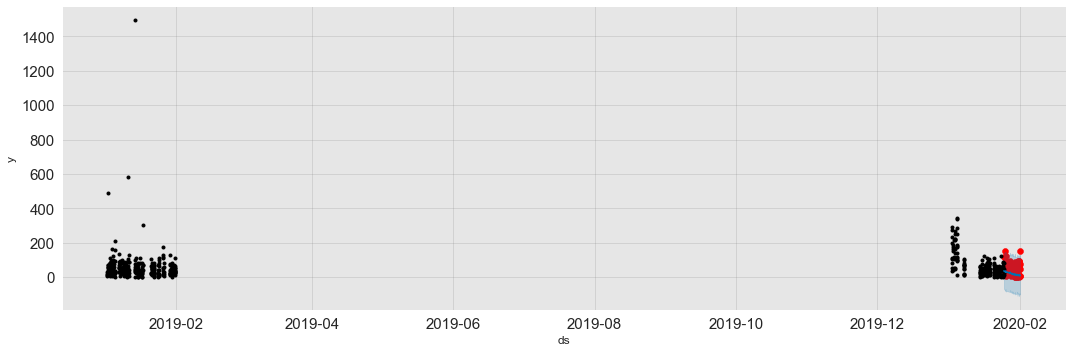

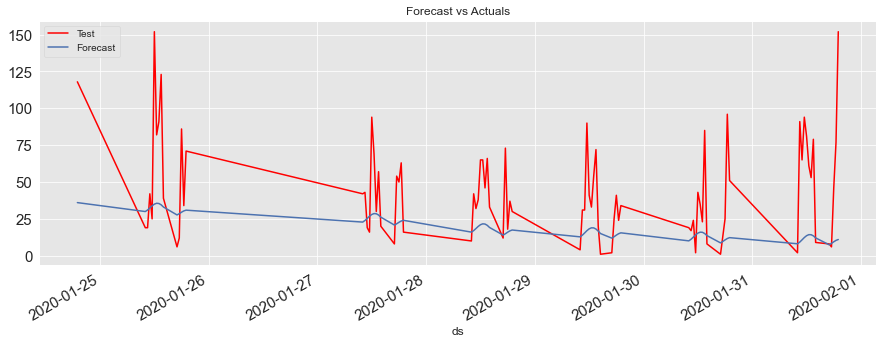

In [3]:
# 22/09/2021 PREVISÕES COM MANUAL EVALUATION
data_files = make_ds.load_csv_dataset('datasets')
work_hours = ['10', '11', '12', '13', '14', '15', '16', '17', '18', '19']
studied_periods = ['m', 'w']
horizons = {'m':'30 days', 'w': '7 days'}
#['not_file.csv', 'not_file_too.csv']
df_store_fcst_analysis = dtexp.get_forecast_analysis()
files_to_not_analyse = [
                    'df_4936.csv',
                    'df_70.csv',
                    'df_4940.csv',
                    'df_4945.csv',
                    'df_4982.csv',
                    'df_4962.csv',
                    'df_4974.csv',
                    'df_4972.csv',
                    'df_4971.csv',
                    'df_2131.csv',
                    'df_28.csv']
for store_no in df_store_fcst_analysis.store.unique():
    files_to_not_analyse.append('df_'+str(store_no)+'.csv')

for files in data_files:
    if files not in files_to_not_analyse:
        store_no = re.sub('[^0-9]','', files)
        df = pd.read_csv(csvpath + '/datasets/'+files, sep=',')
        df['ds'] = pd.DatetimeIndex(df['ds'])
        if undesired_column in df.columns:
            df.drop(columns=undesired_column, inplace=True)
        df[df['y'] > 0].groupby(df['ds'].dt.hour)['ds'].count()
        dtview.view_df_hours_distribution(df, store_no)
        valid_hours = pd.DataFrame(df[df['y'] > 0].groupby(df['ds'].dt.hour)['ds'].count())
        most_freq_hours = dtview.view_df_hours_distribution(df, store_no)
        valid_hours.index.name='hour'
        freq_hours = valid_hours[valid_hours['ds']>= most_freq_hours].index.values
        
        if df.shape[0] >= 1500:
            df_entropy=dtexp.get_entropy_analysis(int(store_no))
            for prediction_period in studied_periods:
                df_trn, df_tst, forecast, mdl_prophet_SALE, threshold_date, fcst_period = pfcst.prophet_predict_grp(df, hyperparams=True, train_period=prediction_period)
                print('-----------  Store {} --> Forecasting for {} days in the future ---------------'.format(store_no, fcst_period))
                file_sufix = datetime.datetime.now()
                file_sufix_name=re.sub('[-.: ]', '_', str(file_sufix))
                models.save_model(mdl_prophet_SALE,str(store_no)+'_'+file_sufix_name+'.json')
                model_outlier_file_name = str(store_no)+'_'+file_sufix_name+'.json'
                df_tst_s = df_tst.copy()
                df_tst_s['ds'] = pd.to_datetime(df_tst_s['ds'])
                df_tst_s = df_tst_s.set_index(pd.DatetimeIndex(df_tst_s['ds']))
                df_tst_forecast = mdl_prophet_SALE.predict(df_tst_s)
                df_tst_forecast = dtclean.remove_zero_and_negative(df_tst_forecast, 'yhat')
                if df_tst_forecast.shape[0] < df_tst_s.shape[0]:
                    mask = df_tst_s['ds'].isin(df_tst_forecast['ds'])
                    df_tst_s = df_tst_s[mask][['ds', 'y']]
                mse = fm.mse(np.array(df_tst_s['y']),np.array(df_tst_forecast['yhat']))
                mape = fm.mape(np.array(df_tst_s['y']),np.array(df_tst_forecast['yhat']))
                mae = fm.mae(np.array(df_tst_s['y']),np.array(df_tst_forecast['yhat']))
                rmse = fm.rmse(np.array(df_tst_s['y']),np.array(df_tst_forecast['yhat']))
                outlier = 0
                print('================ MANUAL EVALUATION FOR {} ========================'.format(horizons[prediction_period]))
                df_tunned = pfcst.prophet_manual_evaluate_parameters(store_no
                                                                     , df
                                                                     , horizons[prediction_period]
                                                                     , outlier
                                                                     , train_period=prediction_period)

                dtview.plot_train_test_split(df_trn, df_tst_s, threshold_date=threshold_date)
                dtview.plot_forecast(df_tst_forecast, mdl_prophet_SALE, filename=store_no+'_sl_fcst_test_', df_test=df_tst_s)
                dtview.plot_forecast_vs_actuals(df_tst_forecast, df_tst_s, filename=store_no+'_sl_fcst_test_')
                print('================ REMOVING OUTLIERS  STORE {} ====================='.format(store_no))
                # Obtaining the upper and lower fence, which are the outliers interval
                lower_fence, upper_fence = dtexp.compute_iqr(df)
                if lower_fence <= 0:
                    lower_fence = 1
                df_no_out = df[df['y'].between(lower_fence, int(upper_fence))]
                df_trn_nout, df_tst_nout, df_tst_forecast_nout, mdl_prophet_nout_SALE, threshold_date, fcst_period = pfcst.prophet_predict_grp(df_no_out, hyperparams=True, train_period=prediction_period)
                file_sufix = datetime.datetime.now()
                file_sufix_name=re.sub('[-.: ]', '_', str(file_sufix))
                models.save_model(mdl_prophet_nout_SALE,str(store_no)+'_'+file_sufix_name+'.json')
                model_without_outlier_file_name = str(store_no)+'_'+file_sufix_name+'.json'

                df_tst_nout_s = df_tst_nout.copy()
                df_tst_nout_s['ds'] = pd.to_datetime(df_tst_nout_s['ds'])
                df_tst_nout_s = df_tst_nout_s.set_index(pd.DatetimeIndex(df_tst_nout_s['ds']))
                df_tst_forecast_nout_s = mdl_prophet_nout_SALE.predict(df_tst_nout_s)
                df_tst_forecast_nout_s = dtclean.remove_zero_and_negative(df_tst_forecast_nout_s, 'yhat')

                if df_tst_forecast_nout_s.shape[0] < df_tst_nout_s.shape[0]:
                    mask = df_tst_nout_s['ds'].isin(df_tst_forecast_nout_s['ds'])
                    df_tst_nout_s = df_tst_nout_s[mask][['ds', 'y']]

                mse_out =  fm.mse(np.array(df_tst_nout_s['y']),np.array(df_tst_forecast_nout_s['yhat']))
                mape_out = fm.mape(np.array(df_tst_nout_s['y']),np.array(df_tst_forecast_nout_s['yhat']))
                mae_out = fm.mae(np.array(df_tst_nout_s['y']),np.array(df_tst_forecast_nout_s['yhat']))
                rmse_out = fm.rmse(np.array(df_tst_nout_s['y']),np.array(df_tst_forecast_nout_s['yhat']))
                outlier = 1
                print('================ MANUAL EVALUATION FOR {} ========================'.format(horizons[prediction_period]))
                df_tunned = pfcst.prophet_manual_evaluate_parameters(store_no
                                                                     , df_no_out
                                                                     , horizons[prediction_period]
                                                                     , outlier
                                                                     , train_period=prediction_period)

                dtview.plot_train_test_split(df_trn_nout, df_tst_nout_s, threshold_date=threshold_date)
                dtview.plot_forecast(df_tst_forecast_nout_s, mdl_prophet_nout_SALE, filename=store_no+'_sl_nout_fcst_test_', df_test=df_tst_nout_s)
                dtview.plot_forecast_vs_actuals(df_tst_forecast_nout_s, df_tst_nout_s, filename=store_no+'_sl_nout_fcst_test_')
                forecast_analysis={'store':store_no
                                   ,'ApEn':df_entropy.ApEn[0]
                                   ,'df_size':df.shape[0]
                                   ,'fcst_period':fcst_period
                                   ,'freq_hours':str(freq_hours)
                                   ,'work_hours':str(work_hours)
                                   ,'mse':round(mse,3)
                                   ,'rmse':round(rmse,3)
                                   ,'mae':round(mae,3)
                                   ,'mape':round(mape*100,3)
                                   ,'mse_out':round(mse_out,3)
                                   ,'rmse_out':round(rmse_out,3)
                                   ,'mae_out':round(mae_out,3)
                                   ,'mape_out':round(mape_out*100,3)
                                   ,'model_outlier_file_name':model_outlier_file_name
                                   ,'model_without_outlier_file_name':model_without_outlier_file_name
                                  }

                db = gendf.Database()
                db.insert_forecast_analysis(forecast_analysis['store']
                                            , forecast_analysis['ApEn']
                                            , forecast_analysis['df_size']
                                            , forecast_analysis['fcst_period']
                                            , forecast_analysis['freq_hours']
                                            , forecast_analysis['work_hours']
                                            , forecast_analysis['mse']
                                            , forecast_analysis['rmse']
                                            , forecast_analysis['mae']
                                            , forecast_analysis['mape']
                                            , forecast_analysis['mse_out']
                                            , forecast_analysis['rmse_out']
                                            , forecast_analysis['mae_out']
                                            , forecast_analysis['mape_out']
                                            , forecast_analysis['model_outlier_file_name']
                                            , forecast_analysis['model_without_outlier_file_name']
                                           )
        else:
            print('Store {} has less then 1500 records, searching another store ...'.format(store_no))
            files_to_not_analyse.append(str(files))
            files_not_forecasted={'file_name':files, 'file_records':df.shape[0]}
            files_not_forecasted.to_csv(csvpath + '/' + 'files_not_forecasted.csv',sep=',')
    else:
        pass


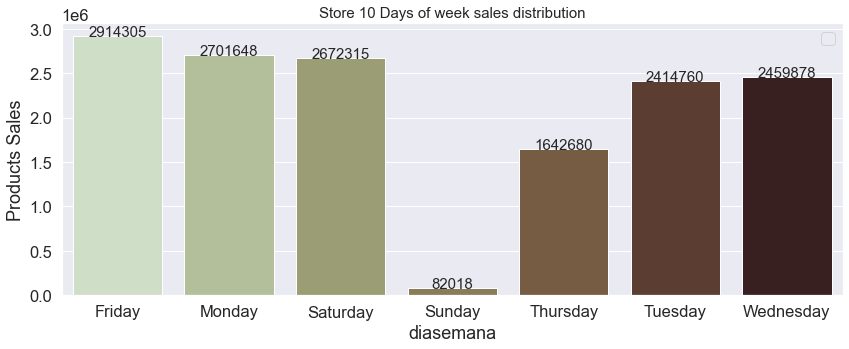

In [214]:
dtview.view_weekly_sales_dist(df,'10')

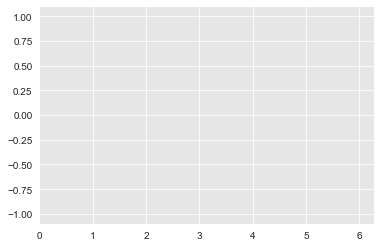

In [7]:
from matplotlib.animation import FuncAnimation
from IPython import display

Figure = plt.figure()

# creating a plot
lines_plotted = plt.plot([])	

# putting limits on x axis since
# it is a trigonometry function
# (0,2∏)
line_plotted = lines_plotted[0]

plt.xlim(0,2*np.pi)

# putting limits on y since it is a
# cosine function
plt.ylim(-1.1,1.1)

# initialising x from 0 to 2∏
x = np.linspace(0,2*np.pi,100)

#initially
y = 0

# function takes frame as an input
def AnimationFunction(frame):

	# setting y according to frame
	# number and + x. It's logic
	y = np.cos(x+2*np.pi*frame/100)

	# line is set with new values of x and y
	line_plotted.set_data((x, y))



In [8]:
anim_created = FuncAnimation(Figure, AnimationFunction, frames=100, interval=25)
video = anim_created.to_html5_video()
html = display.HTML(video)
display.display(html)

# good practice to close the plt object.
plt.close()

In [10]:
from matplotlib import rcParams
rcParams['animation.convert_path'] = r'/usr/local/Cellar/imagemagick/convert'
rcParams['animation.ffmpeg_path'] = r'/usr/local/Cellar/ffmpeg/bin/ffmpeg.exe'

In [11]:
anim_created.save(imgpath+'myAnimation.gif', writer='imagemagick', fps=30)

Initial log joint probability = -10.8876
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        396527   2.55525e-05       1122.83           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        396531   5.34026e-05       15149.5     0.08481           1      237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        396542    0.00192927       11588.1      0.4326           1      353   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     381        396549   1.30744e-05       690.585           1           1      442   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


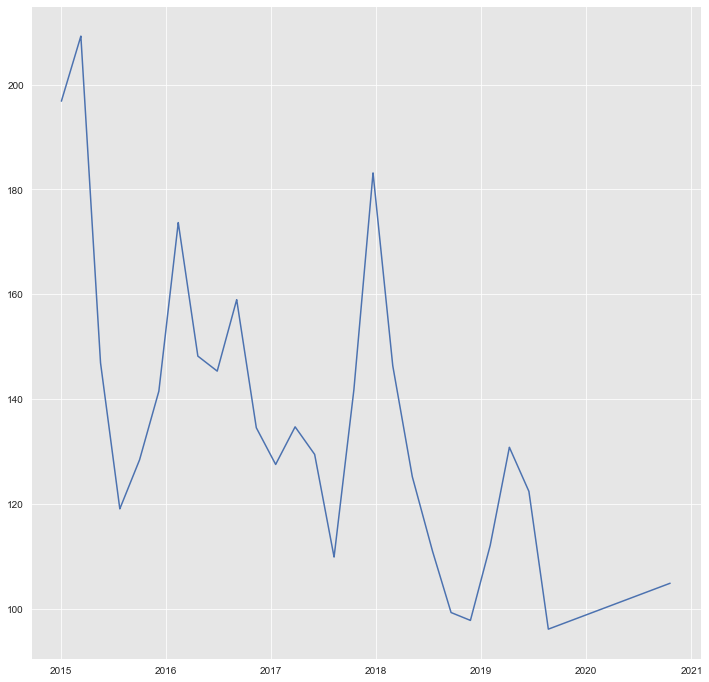

In [12]:
df = pd.read_csv(csvpath + '/datasets/df_40.csv', sep=',')
df['ds'] = pd.DatetimeIndex(df['ds'])
#df.set_index('ds',inplace=True)
df.drop(columns='Unnamed: 0', inplace=True)
#df_trn, df_tst, threshold_date = dtexp.split_dataframe(df)
mdl = Prophet()
mdl.fit(df)
future = mdl.make_future_dataframe(periods=7, freq='30min')
future['ds'] = pd.to_datetime(future['ds'])
future = future.set_index(pd.DatetimeIndex(future['ds']))
forecast = mdl.predict(future)
forecast = dtclean.remove_forecast_negative_values(forecast)
dtview.plot_trend(forecast, mdl, filename='trend_40_2015-2020_animated')

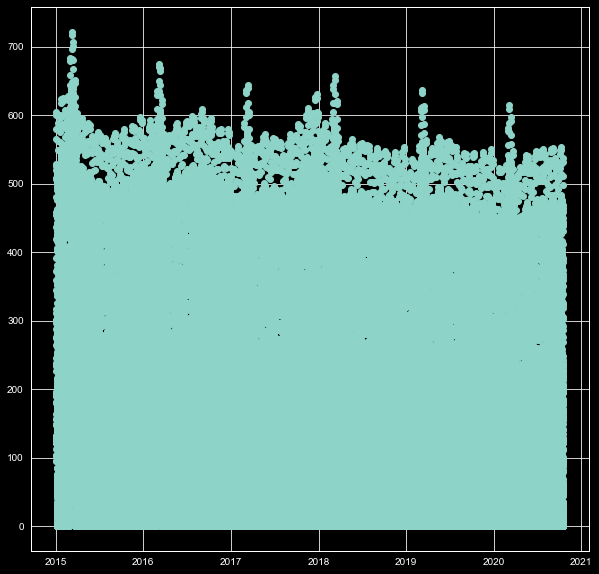

In [27]:
with plt.style.context('dark_background'):
    fig = plt.figure(figsize=(10,10))
    plt.subplot(1,1,1)
    plt.plot(forecast['ds'], forecast['yhat'], linewidth=0,marker="o")

In [14]:
df_merged = forecast.merge(df, on='ds', how = 'left')

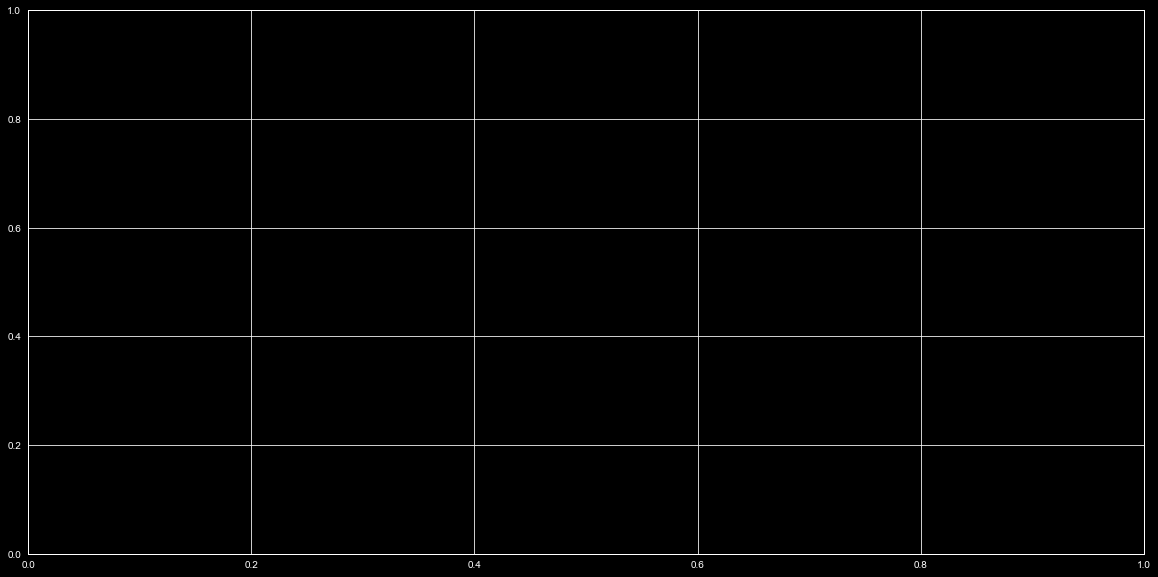

In [15]:
with plt.style.context('dark_background'):
    fig = plt.figure(figsize=(20,10))
    #creating a subplot 
    ax1 = fig.add_subplot(1,1,1)

In [25]:
from matplotlib.animation import PillowWriter
from matplotlib import animation as animation
#here is the animation. 
ani = FuncAnimation(fig, dtview.animate(0, df_merged, ax1), frames = (len(forecast)-len(df)+30), interval=10)
plt.show()
 
#and export
#writergif = animation.PillowWriter(fps=30, metadata=dict(artist='Arthur_Moreau')) 
ani.save(imgpath+'animation_trend_40_2015-2020_video.gif', writer='imagemagick', fps=30)

IndexError: list index out of range